# **EDA Analysis - Version 2 - This section performs EDA on the datasets considering the two objectives of the research:**
# 1. Find the optimal number of charging ports at the existing location for a zip code.
# 2. Find the optimal location for a new charging station for a zip code.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 718.0 kB/s eta 0:00:00


In [3]:
#Import Libraries

from os import getcwd
from os.path import isfile
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pylab

from chart_studio import plotly
import plotly.offline as pyoff
import plotly.graph_objs as go


#inititate Plotly
pyoff.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [4]:
%pwd


'/content'

In [5]:
%cd '/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data'

/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data


In [ ]:
#Load the dataset as a pandas dataframe (Charging Stations Dataset)
processed_cs2_df = pd.read_csv('chargingstations_edits.csv', low_memory=False)
processed_cs2_df.head()

,ZipCode,Charging Station,Address,City,State,Latitude,Longitude,Start Date,End Date,Total Duration,Charging Time,Charging Port Type,Charging Ports,Plug Type,Energy Consumed,Charges
0,94301,PALO ALTO CA / BRYANT #1,445 Bryant St,Palo Alto,California,37.446651,-122.161919,09-06-2020 11:22,09-06-2020 13:03,01:40:27,01:40:16,Level 2,1,J1772,5.355,1.23
1,94301,PALO ALTO CA / BRYANT #1,445 Bryant St,Palo Alto,California,37.446651,-122.161919,09-07-2020 12:51,09-07-2020 13:44,00:53:04,00:52:09,Level 2,1,J1772,5.297,1.22
2,94301,PALO ALTO CA / BRYANT #1,445 Bryant St,Palo Alto,California,37.446651,-122.161919,10/13/20 13:40,10/13/20 15:01,01:20:57,01:20:35,Level 2,1,J1772,4.361,1.00
3,94301,PALO ALTO CA / BRYANT #1,445 Bryant St,Palo Alto,California,37.446651,-122.161919,10/14/20 9:23,10/15/20 7:52,22:29:11,07:12:13,Level 2,1,J1772,42.064,38.97
4,94301,PALO ALTO CA / BRYANT #1,445 Bryant St,Palo Alto,California,37.446651,-122.161919,10/17/20 16:22,10/17/20 17:18,00:56:18,00:55:51,Level 2,1,J1772,5.430,1.25


In [ ]:
#Find the unique enteries in the columns [ZipCode, Charging Station, Address] and list them out with the count

select_columns = ['Charging Station', 'Address']
unique_enteries_cs2_df = processed_cs2_df.reindex(columns = select_columns)

for column in unique_enteries_cs2_df.columns:
    print(f"Unique entries and counts for column '{column}':")
    print(unique_enteries_cs2_df[column].value_counts())
    print()


Unique entries and counts for column 'Charging Station':
Charging Station
PALO ALTO CA / HAMILTON #2        23721
PALO ALTO CA / HAMILTON #1        14888
PALO ALTO CA / WEBSTER #1         14432
PALO ALTO CA / BRYANT #2          14389
PALO ALTO CA / HIGH #4            13898
PALO ALTO CA / BRYANT #1          13449
PALO ALTO CA / WEBSTER #2         12669
PALO ALTO CA / CAMBRIDGE #1       11163
PALO ALTO CA / HIGH #1            10756
PALO ALTO CA / WEBSTER #3         10484
PALO ALTO CA / TED THOMPSON #1     9814
PALO ALTO CA / CAMBRIDGE #2        9256
PALO ALTO CA / MPL #6              8996
PALO ALTO CA / HIGH #3             8317
PALO ALTO CA / MPL #4              7787
PALO ALTO CA / MPL #5              7544
PALO ALTO CA / HIGH #2             6930
PALO ALTO CA / RINCONADA LIB 3     6499
PALO ALTO CA / RINCONADA LIB 1     6212
PALO ALTO CA / BRYANT #6           5857
PALO ALTO CA / RINCONADA LIB 2     5553
PALO ALTO CA / BRYANT #5           5332
PALO ALTO CA / CAMBRIDGE #5        4556
PALO A

In [ ]:
processed_cs2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ZipCode             259415 non-null  int64  
 1   Charging Station    259415 non-null  object 
 2   Address             259415 non-null  object 
 3   City                259415 non-null  object 
 4   State               259415 non-null  object 
 5   Latitude            259415 non-null  float64
 6   Longitude           259415 non-null  float64
 7   Start Date          259415 non-null  object 
 8   End Date            259415 non-null  object 
 9   Total Duration      259415 non-null  object 
 10  Charging Time       259415 non-null  object 
 11  Charging Port Type  259406 non-null  object 
 12  Charging Ports      259415 non-null  int64  
 13  Plug Type           259415 non-null  object 
 14  Energy Consumed     259415 non-null  float64
 15  Charges             259415 non-nul

In [ ]:
#Select only those columns that are required - filtering the dataset
keep_columns = ['ZipCode', 'Charging Station','Address','Start Date','End Date','Total Duration','Charging Time','Charging Port Type','Charging Ports','Plug Type','Energy Consumed']
processed_cs3_df = processed_cs2_df[keep_columns]
processed_cs3_df.head()

,ZipCode,Charging Station,Address,Start Date,End Date,Total Duration,Charging Time,Charging Port Type,Charging Ports,Plug Type,Energy Consumed
0,94301,PALO ALTO CA / BRYANT #1,445 Bryant St,09-06-2020 11:22,09-06-2020 13:03,01:40:27,01:40:16,Level 2,1,J1772,5.355
1,94301,PALO ALTO CA / BRYANT #1,445 Bryant St,09-07-2020 12:51,09-07-2020 13:44,00:53:04,00:52:09,Level 2,1,J1772,5.297
2,94301,PALO ALTO CA / BRYANT #1,445 Bryant St,10/13/20 13:40,10/13/20 15:01,01:20:57,01:20:35,Level 2,1,J1772,4.361
3,94301,PALO ALTO CA / BRYANT #1,445 Bryant St,10/14/20 9:23,10/15/20 7:52,22:29:11,07:12:13,Level 2,1,J1772,42.064
4,94301,PALO ALTO CA / BRYANT #1,445 Bryant St,10/17/20 16:22,10/17/20 17:18,00:56:18,00:55:51,Level 2,1,J1772,5.430


In [ ]:
# Define a dictionary mapping the unique values to their replacements
replacements = {
    'PALO ALTO CA / HAMILTON #2': 'HAMILTON #2',
    'PALO ALTO CA / HAMILTON #1': 'HAMILTON #1',
    'PALO ALTO CA / WEBSTER #1': 'WEBSTER #1',
    'PALO ALTO CA / BRYANT #2': 'BRYANT #2',
    'PALO ALTO CA / HIGH #4': 'HIGH #4',
    'PALO ALTO CA / BRYANT #1': 'BRYANT #1',
    'PALO ALTO CA / WEBSTER #2': 'WEBSTER #2',
    'PALO ALTO CA / CAMBRIDGE #1':'CAMBRIDGE #1',
    'PALO ALTO CA / HIGH #1': 'HIGH #1',
    'PALO ALTO CA / WEBSTER #3': 'WEBSTER #3',
    'PALO ALTO CA / TED THOMPSON #1': 'TED THOMPSON #1',
    'PALO ALTO CA / CAMBRIDGE #2': 'CAMBRIDGE #2',
    'PALO ALTO CA / MPL #6': 'MPL #6',
    'PALO ALTO CA / HIGH #3': 'HIGH #3',
    'PALO ALTO CA / MPL #4': 'MPL #4',
    'PALO ALTO CA / MPL #5': 'MPL #5',
    'PALO ALTO CA / HIGH #2': 'HIGH #2',
    'PALO ALTO CA / RINCONADA LIB 3': 'RINCONADA LIB #3',
    'PALO ALTO CA / RINCONADA LIB 1': 'RINCONADA LIB #1',
    'PALO ALTO CA / BRYANT #6': 'BRYANT #6',
    'PALO ALTO CA / RINCONADA LIB 2': 'RINCONADA LIB #2',
    'PALO ALTO CA / BRYANT #5': 'BRYANT #5',
    'PALO ALTO CA / CAMBRIDGE #5': 'CAMBRIDGE #5',
    'PALO ALTO CA / CAMBRIDGE #3': 'CAMBRIDGE #3',
    'PALO ALTO CA / BRYANT #3': 'BRYANT #3',
    'PALO ALTO CA / BRYANT #4': 'BRYANT #4',
    'PALO ALTO CA / CAMBRIDGE #4': 'CAMBRIDGE #4',
    'PALO ALTO CA / TED THOMPSON #3': 'TED THOMPSON #3',
    'PALO ALTO CA / TED THOMPSON #4': 'TED THOMPSON #4',
    'PALO ALTO CA / TED THOMPSON #2': 'TED THOMPSON #2',
    'PALO ALTO CA / MPL #2': 'MPL #2',
    'PALO ALTO CA / MPL #3': 'MPL #3',
    'PALO ALTO CA / MPL #1': 'MPL #1',
    'PALO ALTO CA / BRYANT # 1': 'BRYANT #1',
    'PALO ALTO CA / SHERMAN 3': 'SHERMAN #3',
    'PALO ALTO CA / SHERMAN 1': 'SHERMAN #1',
    'PALO ALTO CA / SHERMAN 2': 'SHERMAN #2',
    'PALO ALTO CA / SHERMAN 4': 'SHERMAN #4',
    'PALO ALTO CA / SHERMAN 7': 'SHERMAN #7',
    'PALO ALTO CA / SHERMAN 6': 'SHERMAN #6',
    'PALO ALTO CA / SHERMAN 8': 'SHERMAN #8',
    'PALO ALTO CA / SHERMAN 14': 'SHERMAN #14',
    'PALO ALTO CA / SHERMAN 17': 'SHERMAN #17',
    'PALO ALTO CA / SHERMAN 9': 'SHERMAN #9',
    'PALO ALTO CA / SHERMAN 15': 'SHERMAN #15',
    'PALO ALTO CA / SHERMAN 11': 'SHERMAN #11',
    'PALO ALTO CA / SHERMAN 5': 'SHERMAN #5',
}

# Replace the values in the 'Port Type' column based on the mappings
processed_cs3_df['Charging Station'] = processed_cs3_df['Charging Station'].replace(replacements)
processed_cs3_df.to_csv('/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/cs3_processed.csv', index=False)
processed_cs3_df

<ipython-input-25-9365adcb8f0b>:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ZipCode,Charging Station,Address,Start Date,End Date,Total Duration,Charging Time,Charging Port Type,Charging Ports,Plug Type,Energy Consumed
0,94301,BRYANT #1,445 Bryant St,09-06-2020 11:22,09-06-2020 13:03,01:40:27,01:40:16,Level 2,1,J1772,5.355
1,94301,BRYANT #1,445 Bryant St,09-07-2020 12:51,09-07-2020 13:44,00:53:04,00:52:09,Level 2,1,J1772,5.297
2,94301,BRYANT #1,445 Bryant St,10/13/20 13:40,10/13/20 15:01,01:20:57,01:20:35,Level 2,1,J1772,4.361
3,94301,BRYANT #1,445 Bryant St,10/14/20 9:23,10/15/20 7:52,22:29:11,07:12:13,Level 2,1,J1772,42.064
4,94301,BRYANT #1,445 Bryant St,10/17/20 16:22,10/17/20 17:18,00:56:18,00:55:51,Level 2,1,J1772,5.430
...,...,...,...,...,...,...,...,...,...,...,...
259410,94306,TED THOMPSON #4,275 Cambridge Ave,12/28/20 17:08,12/28/20 22:55,05:47:32,05:02:46,Level 2,1,J1772,30.237
259411,94306,TED THOMPSON #4,275 Cambridge Ave,12/29/20 10:38,12/29/20 13:33,02:54:34,02:40:01,Level 2,2,J1772,15.397
259412,94306,TED THOMPSON #4,275 Cambridge Ave,12/29/20 15:22,12/29/20 15:39,00:17:17,00:17:00,Level 2,2,J1772,0.865
259413,94306,TED THOMPSON #4,275 Cambridge Ave,12/30/20 10:53,12/30/20 13:51,02:58:32,02:40:48,Level 2,2,J1772,15.540


In [ ]:
processed_cs4_df = processed_cs3_df.drop('Start Date', axis=1)
processed_cs4_df.to_csv('/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/cs4_processed.csv', index=False)
processed_cs4_df

,ZipCode,Charging Station,Address,End Date,Total Duration,Charging Time,Charging Port Type,Charging Ports,Plug Type,Energy Consumed
0,94301,BRYANT #1,445 Bryant St,09-06-2020 13:03,01:40:27,01:40:16,Level 2,1,J1772,5.355
1,94301,BRYANT #1,445 Bryant St,09-07-2020 13:44,00:53:04,00:52:09,Level 2,1,J1772,5.297
2,94301,BRYANT #1,445 Bryant St,10/13/20 15:01,01:20:57,01:20:35,Level 2,1,J1772,4.361
3,94301,BRYANT #1,445 Bryant St,10/15/20 7:52,22:29:11,07:12:13,Level 2,1,J1772,42.064
4,94301,BRYANT #1,445 Bryant St,10/17/20 17:18,00:56:18,00:55:51,Level 2,1,J1772,5.430
...,...,...,...,...,...,...,...,...,...,...
259410,94306,TED THOMPSON #4,275 Cambridge Ave,12/28/20 22:55,05:47:32,05:02:46,Level 2,1,J1772,30.237
259411,94306,TED THOMPSON #4,275 Cambridge Ave,12/29/20 13:33,02:54:34,02:40:01,Level 2,2,J1772,15.397
259412,94306,TED THOMPSON #4,275 Cambridge Ave,12/29/20 15:39,00:17:17,00:17:00,Level 2,2,J1772,0.865
259413,94306,TED THOMPSON #4,275 Cambridge Ave,12/30/20 13:51,02:58:32,02:40:48,Level 2,2,J1772,15.540


In [ ]:
#Find the unique enteries in the columns [ZipCode, Charging Station, Address] and list them out with the count
select_columns = ['Charging Station', 'Address']
unique_enteries_cs4_df = processed_cs4_df.reindex(columns = select_columns)

for column in unique_enteries_cs4_df.columns:
    print(f"Unique entries and counts for column '{column}':")
    print(unique_enteries_cs4_df[column].value_counts())
    print()

Unique entries and counts for column 'Charging Station':
Charging Station
HAMILTON #2         23721
HAMILTON #1         14888
WEBSTER #1          14432
BRYANT #2           14389
HIGH #4             13898
BRYANT #1           13449
WEBSTER #2          12669
CAMBRIDGE #1        11163
HIGH #1             10756
WEBSTER #3          10484
TED THOMPSON #1      9814
CAMBRIDGE #2         9256
MPL #6               8996
HIGH #3              8317
MPL #4               7787
MPL #5               7544
HIGH #2              6930
RINCONADA LIB #3     6499
RINCONADA LIB #1     6212
BRYANT #6            5857
RINCONADA LIB #2     5553
BRYANT #5            5332
CAMBRIDGE #5         4556
CAMBRIDGE #3         4476
BRYANT #3            4475
BRYANT #4            3598
CAMBRIDGE #4         3428
TED THOMPSON #3      2455
TED THOMPSON #4      2226
TED THOMPSON #2      2217
MPL #2               1535
MPL #3               1420
MPL #1               1044
SHERMAN #3              8
SHERMAN #1              7
SHERMAN #2      

In [ ]:
#Modifying dataset to meet the requirements of the work
processed_cs5_df = pd.read_csv('/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/cs4_processed.csv')
# Check if "WEBSTER #1" is in the "Charging Station" column and "578 University Ave" is in the "Address" column
if ('WEBSTER #1' in processed_cs5_df['Charging Station'].values) and ('578 University Ave' in processed_cs5_df['Address'].values):
    # Replace all the corresponding "Address" columns related to "WEBSTER #1" with "578 University Ave"
    processed_cs5_df.loc[processed_cs5_df['Charging Station'] == 'WEBSTER #1', 'Address'] = '578 University Ave'
if ('WEBSTER #2' in processed_cs5_df['Charging Station'].values) and ('532 Webster St' in processed_cs5_df['Address'].values):
    processed_cs5_df.loc[processed_cs5_df['Charging Station'] == 'WEBSTER #2', 'Address'] = '532 Webster St'
processed_cs5_df.to_csv('/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/cs5_processed.csv', index=False)


In [ ]:
#Find the unique enteries in the columns [ZipCode, Charging Station, Address] and list them out with the count
select_columns = ['Charging Station', 'Address']
unique_enteries_cs5_df = processed_cs5_df.reindex(columns = select_columns)

for column in unique_enteries_cs5_df.columns:
    print(f"Unique entries and counts for column '{column}':")
    print(unique_enteries_cs5_df[column].value_counts())
    print()

Unique entries and counts for column 'Charging Station':
Charging Station
HAMILTON #2         23721
HAMILTON #1         14888
WEBSTER #1          14432
BRYANT #2           14389
HIGH #4             13898
BRYANT #1           13449
WEBSTER #2          12669
CAMBRIDGE #1        11163
HIGH #1             10756
WEBSTER #3          10484
TED THOMPSON #1      9814
CAMBRIDGE #2         9256
MPL #6               8996
HIGH #3              8317
MPL #4               7787
MPL #5               7544
HIGH #2              6930
RINCONADA LIB #3     6499
RINCONADA LIB #1     6212
BRYANT #6            5857
RINCONADA LIB #2     5553
BRYANT #5            5332
CAMBRIDGE #5         4556
CAMBRIDGE #3         4476
BRYANT #3            4475
BRYANT #4            3598
CAMBRIDGE #4         3428
TED THOMPSON #3      2455
TED THOMPSON #4      2226
TED THOMPSON #2      2217
MPL #2               1535
MPL #3               1420
MPL #1               1044
SHERMAN #3              8
SHERMAN #1              7
SHERMAN #2      

In [ ]:
processed_cs5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ZipCode             259415 non-null  int64  
 1   Charging Station    259415 non-null  object 
 2   Address             259415 non-null  object 
 3   End Date            259415 non-null  object 
 4   Total Duration      259415 non-null  object 
 5   Charging Time       259415 non-null  object 
 6   Charging Port Type  259406 non-null  object 
 7   Charging Ports      259415 non-null  int64  
 8   Plug Type           259415 non-null  object 
 9   Energy Consumed     259415 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 19.8+ MB


In [ ]:
processed_cs5_df = processed_cs5_df.dropna(subset=['Charging Port Type']).reset_index()

processed_cs5_df.to_csv('/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/cs6_processed.csv', index=False)


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
processed_cs6_df = pd.read_csv('/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/cs6_processed.csv')

# Replace "Hamilton #1" and "Hamilton #2" with "Hamilton" in the "Charging Station" column
processed_cs6_df['Charging Station'] = processed_cs6_df['Charging Station'].replace(['HAMILTON #1', 'HAMILTON #2'], 'HAMILTON')
processed_cs6_df['Charging Station'] = processed_cs6_df['Charging Station'].replace(['BRYANT #1', 'BRYANT #2','BRYANT #3', 'BRYANT #4','BRYANT #5','BRYANT #6'], 'BRYANT')
processed_cs6_df['Charging Station'] = processed_cs6_df['Charging Station'].replace(['HIGH #1', 'HIGH #2','HIGH #3', 'HIGH #4'], 'HIGH')
processed_cs6_df['Charging Station'] = processed_cs6_df['Charging Station'].replace(['CAMBRIDGE #1', 'CAMBRIDGE #2','CAMBRIDGE #3', 'CAMBRIDGE #4','CAMBRIDGE #5'], 'CAMBRIDGE')
processed_cs6_df['Charging Station'] = processed_cs6_df['Charging Station'].replace(['MPL #1', 'MPL #2','MPL #3', 'MPL #4','MPL #5','MPL #6'], 'MPL')
processed_cs6_df['Charging Station'] = processed_cs6_df['Charging Station'].replace(['TED THOMPSON #1', 'TED THOMPSON #2','TED THOMPSON #3', 'TED THOMPSON #4'], 'TED THOMPSON')
processed_cs6_df['Charging Station'] = processed_cs6_df['Charging Station'].replace(['SHERMAN #1', 'SHERMAN #2','SHERMAN #3', 'SHERMAN #4','SHERMAN #5','SHERMAN #6','SHERMAN #7',
                                                                                     'SHERMAN #8', 'SHERMAN #9','SHERMAN #11', 'SHERMAN #14','SHERMAN #15','SHERMAN #17'], 'SHERMAN')

# Save the updated DataFrame back to the CSV file
processed_cs6_df.to_csv('CS_Processed_v1.csv', index=False)

In [ ]:
processed_cs6_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259406 entries, 0 to 259405
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               259406 non-null  int64  
 1   ZipCode             259406 non-null  int64  
 2   Charging Station    259406 non-null  object 
 3   Address             259406 non-null  object 
 4   End Date            259406 non-null  object 
 5   Total Duration      259406 non-null  object 
 6   Charging Time       259406 non-null  object 
 7   Charging Port Type  259406 non-null  object 
 8   Charging Ports      259406 non-null  int64  
 9   Plug Type           259406 non-null  object 
 10  Energy Consumed     259406 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 21.8+ MB


# **Combine all charging stations at the same address and location as a single entity and sum up the total charging points**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Read the CSV file into a DataFrame
df= pd.read_csv('/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/cs6_processed.csv')

# Group by charging station and find the maximum number of charging ports
max_ports_per_station = df.groupby('Charging Station')['Charging Ports'].max()

# Filter the DataFrame for "BRYANT #1", "BRYANT #2", "BRYANT #3", and "BRYANT #4"
bryant_stations = ["BRYANT #1", "BRYANT #2", "BRYANT #3", "BRYANT #4", "BRYANT #5", "BRYANT #6"]
df_bryant = df[df['Charging Station'].isin(bryant_stations)]
hamilton_stations = ['HAMILTON #1', 'HAMILTON #2']
df_hamilton = df[df['Charging Station'].isin(hamilton_stations)]
high_stations = ['HIGH #1', 'HIGH #2','HIGH #3', 'HIGH #4']
df_high = df[df['Charging Station'].isin(high_stations)]
cambridge_stations = ['CAMBRIDGE #1', 'CAMBRIDGE #2','CAMBRIDGE #3', 'CAMBRIDGE #4','CAMBRIDGE #5']
df_cambridge = df[df['Charging Station'].isin(cambridge_stations)]
mpl_stations = ['MPL #1', 'MPL #2','MPL #3', 'MPL #4','MPL #5','MPL #6']
df_mpl = df[df['Charging Station'].isin(mpl_stations)]
ted_stations = ['TED THOMPSON #1', 'TED THOMPSON #2','TED THOMPSON #3', 'TED THOMPSON #4']
df_ted = df[df['Charging Station'].isin(ted_stations)]
sherman_stations = ['SHERMAN #1', 'SHERMAN #2','SHERMAN #3', 'SHERMAN #4','SHERMAN #5','SHERMAN #6','SHERMAN #7',
                        'SHERMAN #8', 'SHERMAN #9','SHERMAN #11', 'SHERMAN #14','SHERMAN #15','SHERMAN #17']
df_sherman = df[df['Charging Station'].isin(sherman_stations)]
webster1_stations = ['WEBSTER #1']
df_webster1 = df[df['Charging Station'].isin(webster1_stations)]
webster2_stations = ['WEBSTER #2']
df_webster2 = df[df['Charging Station'].isin(webster2_stations)]
webster3_stations = ['WEBSTER #3']
df_webster3 = df[df['Charging Station'].isin(webster3_stations)]
rin1_stations = ['RINCONADA LIB #1']
df_rin1 = df[df['Charging Station'].isin(rin1_stations)]
rin2_stations = ['RINCONADA LIB #2']
df_rin2 = df[df['Charging Station'].isin(rin2_stations)]
rin3_stations = ['RINCONADA LIB #3']
df_rin3 = df[df['Charging Station'].isin(rin3_stations)]

# Sum up the maximum charging ports for "BRYANT #1", "BRYANT #2", "BRYANT #3", and "BRYANT #4"
total_bryant_ports = max_ports_per_station[bryant_stations].sum()
total_hamilton_ports = max_ports_per_station[hamilton_stations].sum()
total_high_ports = max_ports_per_station[high_stations].sum()
total_cambridge_ports = max_ports_per_station[cambridge_stations].s um()
total_mpl_ports = max_ports_per_station[mpl_stations].sum()
total_ted_ports = max_ports_per_station[ted_stations].sum()
total_sherman_ports = max_ports_per_station[sherman_stations].sum()
total_webster1_ports = max_ports_per_station[webster1_stations].sum()
total_webster2_ports = max_ports_per_station[webster2_stations].sum()
total_webster3_ports = max_ports_per_station[webster3_stations].sum()
total_rin1_ports = max_ports_per_station[rin1_stations].sum()
total_rin2_ports = max_ports_per_station[rin2_stations].sum()
total_rin3_ports = max_ports_per_station[rin3_stations].sum()

# Replace the 'Charging Station' value with "BRYANT" for all "BRYANT #1", "BRYANT #2", "BRYANT #3", and "BRYANT #4" rows
df_bryant['Charging Station'] = 'BRYANT'
df_hamilton['Charging Station'] = 'HAMILTON'
df_high['Charging Station'] = 'HIGH'
df_cambridge['Charging Station'] = 'CAMBRIDGE'
df_mpl['Charging Station'] = 'MPL'
df_ted['Charging Station'] = 'TED THOMPSON'
df_sherman['Charging Station'] = 'SHERMAN'

# Update the 'Charging Ports' value with the summed up value for all "BRYANT" rows
df_bryant['Charging Ports'] = total_bryant_ports
df_hamilton['Charging Ports'] = total_hamilton_ports
df_high['Charging Ports'] = total_high_ports
df_cambridge['Charging Ports'] = total_cambridge_ports
df_mpl['Charging Ports'] = total_mpl_ports
df_ted['Charging Ports'] = total_ted_ports
df_sherman['Charging Ports'] = total_sherman_ports
df_webster1['Charging Ports'] = total_webster1_ports
df_webster2['Charging Ports'] = total_webster2_ports
df_webster3['Charging Ports'] = total_webster3_ports
df_rin1['Charging Ports'] = total_rin1_ports
df_rin2['Charging Ports'] = total_rin2_ports
df_rin3['Charging Ports'] = total_rin3_ports


# Combine the updated rows for all charging stations with the rest of the DataFrame
df_updated = pd.concat([
    df[~df['Charging Station'].isin(bryant_stations + hamilton_stations + high_stations +
                                     cambridge_stations + mpl_stations + ted_stations + sherman_stations+
                                     webster1_stations+webster2_stations+webster3_stations+
                                    rin1_stations+rin2_stations+rin3_stations)],
    df_bryant,
    df_hamilton,
    df_high,
    df_cambridge,
    df_mpl,
    df_ted,
    df_sherman,
    df_webster1,
    df_webster2,
    df_webster3,
    df_rin1,
    df_rin2,
    df_rin3

])


# Save the updated DataFrame to a new CSV file
df_updated.to_csv('CS_Processed_v3.csv', index=False)

#**analyze the distribution of charging points per charging station in the specific pincode**

Distribution of Charging Points per Charging Station:
Charging Ports
2     3
12    1
4     1
8     1
Name: count, dtype: int64


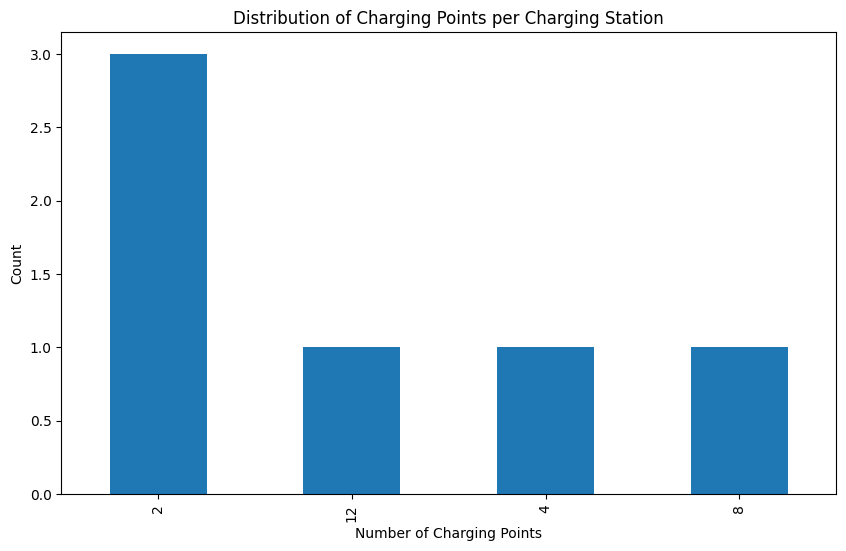

In [ ]:
#analyze the distribution of charging points per charging station in the specific pincode

# Read the CSV file into a DataFrame
cp_df = pd.read_csv('CS_Processed_v3.csv')

# Filter the DataFrame for the specific pincode
pincode = 94301
cp_df_filtered = cp_df[cp_df['ZipCode'] == pincode]

# Group by charging station and count the number of charging points
charging_points_per_station = cp_df_filtered.groupby('Charging Station')['Charging Ports'].max()

# Analyze the distribution of charging points per charging station
print("Distribution of Charging Points per Charging Station:")
print(charging_points_per_station.value_counts())

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
charging_points_per_station.value_counts().plot(kind='bar')
plt.xlabel('Number of Charging Points')
plt.ylabel('Count')
plt.title('Distribution of Charging Points per Charging Station')
plt.show()

Distribution of Charging Points per Charging Station:
Charging Ports
2    3
6    1
Name: count, dtype: int64


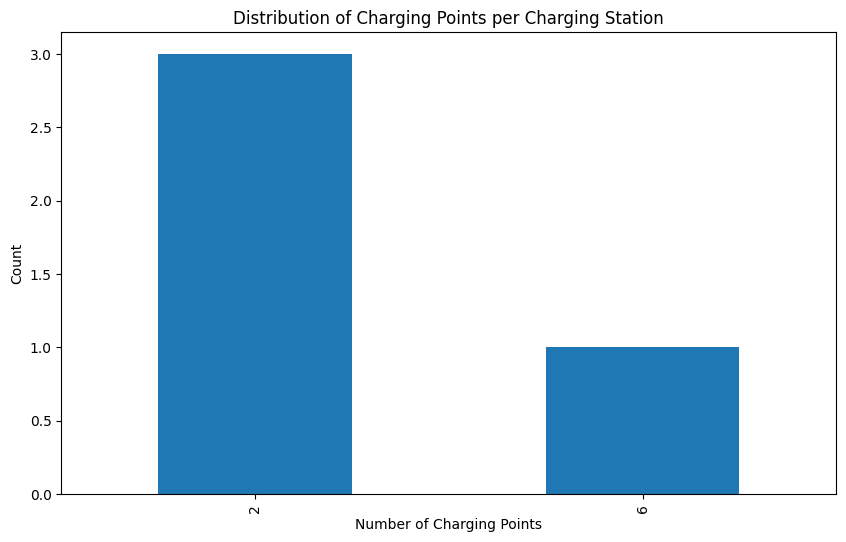

In [ ]:
#analyze the distribution of charging points per charging station in the specific pincode

# Read the CSV file into a DataFrame
cp_df = pd.read_csv('CS_Processed_v3.csv')

# Filter the DataFrame for the specific pincode
pincode = 94303
cp_df_filtered = cp_df[cp_df['ZipCode'] == pincode]

# Group by charging station and count the number of charging points
charging_points_per_station = cp_df_filtered.groupby('Charging Station')['Charging Ports'].max()

# Analyze the distribution of charging points per charging station
print("Distribution of Charging Points per Charging Station:")
print(charging_points_per_station.value_counts())

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
charging_points_per_station.value_counts().plot(kind='bar')
plt.xlabel('Number of Charging Points')
plt.ylabel('Count')
plt.title('Distribution of Charging Points per Charging Station')
plt.show()

Distribution of Charging Points per Charging Station:
Charging Ports
10    1
22    1
8     1
Name: count, dtype: int64


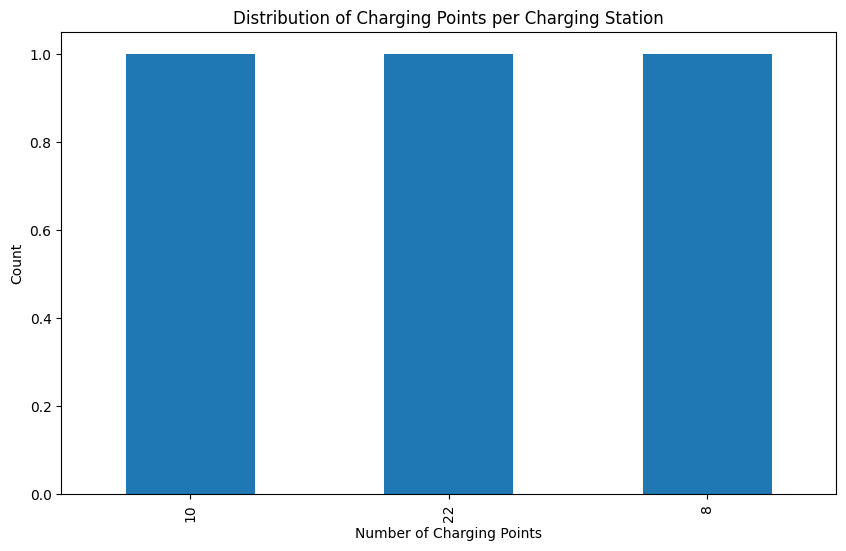

In [ ]:
#analyze the distribution of charging points per charging station in the specific pincode

# Read the CSV file into a DataFrame
cp_df = pd.read_csv('CS_Processed_v3.csv')

# Filter the DataFrame for the specific pincode
pincode = 94306
cp_df_filtered = cp_df[cp_df['ZipCode'] == pincode]

# Group by charging station and count the number of charging points
charging_points_per_station = cp_df_filtered.groupby('Charging Station')['Charging Ports'].max()

# Analyze the distribution of charging points per charging station
print("Distribution of Charging Points per Charging Station:")
print(charging_points_per_station.value_counts())

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
charging_points_per_station.value_counts().plot(kind='bar')
plt.xlabel('Number of Charging Points')
plt.ylabel('Count')
plt.title('Distribution of Charging Points per Charging Station')
plt.show()

#**Analysis of Charging ports - Mean of Total Duration, Total Charging Time, Total Energy Consumed per Charging Port**


    ZipCode  Charging Station  Charging Ports  Total Duration (hours)  \
0     94301            BRYANT              12                2.486698   
1     94301          HAMILTON               4                2.519728   
2     94301              HIGH               8                2.322369   
3     94301        WEBSTER #1               2                2.762036   
4     94301        WEBSTER #2               2                2.811074   
5     94301        WEBSTER #3               2                2.663330   
6     94303               MPL               6                2.537603   
7     94303  RINCONADA LIB #1               2                2.677059   
8     94303  RINCONADA LIB #2               2                2.658286   
9     94303  RINCONADA LIB #3               2                2.567956   
10    94306         CAMBRIDGE              10                2.141232   
11    94306           SHERMAN              22                2.646282   
12    94306      TED THOMPSON               8      

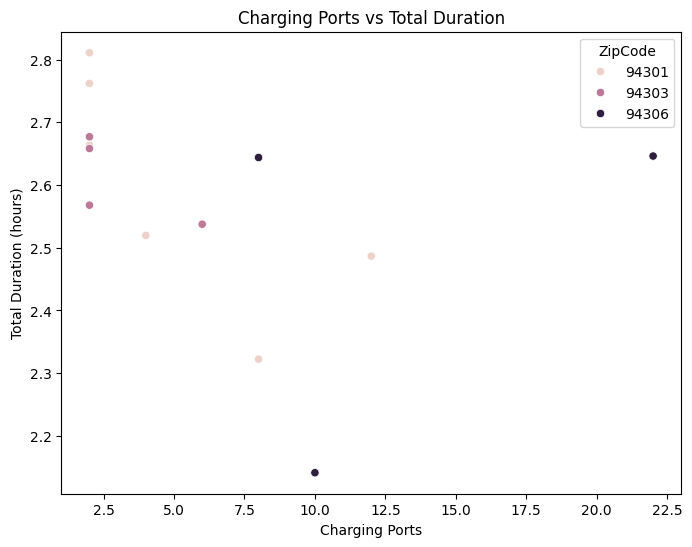

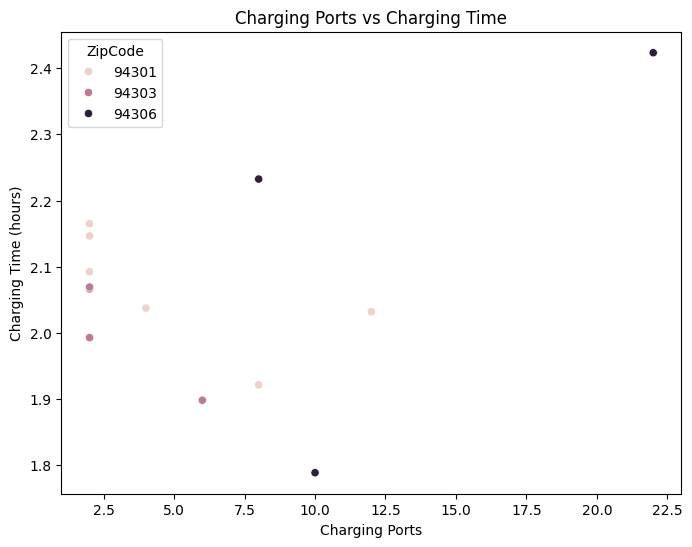

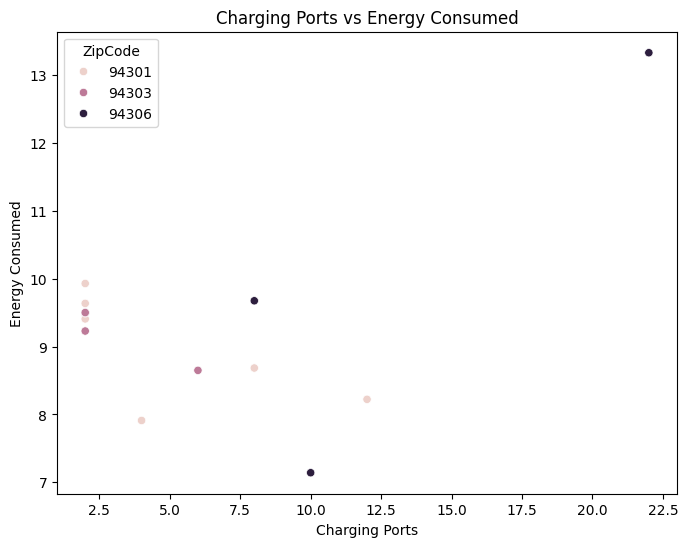

In [ ]:
#Analysis of Charging ports - Mean of Total Duration, Total Charging Time, Total Energy Consumed per Charging Port
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'Total Duration' and 'Charging Time' to timedelta
df['Total Duration'] = pd.to_timedelta(df['Total Duration'])
df['Charging Time'] = pd.to_timedelta(df['Charging Time'])

# Extract hours from 'Total Duration' and 'Charging Time'
df['Total Duration (hours)'] = df['Total Duration'].dt.total_seconds() / 3600
df['Charging Time (hours)'] = df['Charging Time'].dt.total_seconds() / 3600

# Group by 'ZipCode' and 'Charging Station' and calculate the mean of other variables
grouped_df = df.groupby(['ZipCode', 'Charging Station']).agg({
    'Charging Ports': 'first',
    'Total Duration (hours)': 'mean',
    'Charging Time (hours)': 'mean',
    'Energy Consumed': 'mean'
}).reset_index()

print(grouped_df)
grouped_df.to_csv("chargingports_analysis1.csv", index=False)

# Create a scatter plot of 'Charging Ports' vs 'Total Duration (hours)'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped_df, x='Charging Ports', y='Total Duration (hours)', hue='ZipCode')
plt.title('Charging Ports vs Total Duration')
plt.xlabel('Charging Ports')
plt.ylabel('Total Duration (hours)')
plt.show()

# Create a scatter plot of 'Charging Ports' vs 'Charging Time (hours)'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped_df, x='Charging Ports', y='Charging Time (hours)', hue='ZipCode')
plt.title('Charging Ports vs Charging Time')
plt.xlabel('Charging Ports')
plt.ylabel('Charging Time (hours)')
plt.show()

# Create a scatter plot of 'Charging Ports' vs 'Energy Consumed'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped_df, x='Charging Ports', y='Energy Consumed', hue='ZipCode')
plt.title('Charging Ports vs Energy Consumed')
plt.xlabel('Charging Ports')
plt.ylabel('Energy Consumed')
plt.show()

#**Charging ports Analysis - Duration to Charging Time Ratio, Avg. Charging Time, Avg. Energy Consumption**


In [ ]:
#Charging ports Analysis - Merge these findings with CS_Processed_v3 dataset
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'Total Duration' and 'Charging Time' to timedelta
df['Total Duration'] = pd.to_timedelta(df['Total Duration'])
df['Charging Time'] = pd.to_timedelta(df['Charging Time'])

# Extract hours from 'Total Duration' and 'Charging Time'
df['Total Duration (hours)'] = df['Total Duration'].dt.total_seconds() / 3600
df['Charging Time (hours)'] = df['Charging Time'].dt.total_seconds() / 3600

# Calculate average charging time per charging station
avg_charging_time = df.groupby('Charging Station')['Charging Time (hours)'].mean()

# Calculate average energy consumed per charging station
avg_energy_consumed = df.groupby('Charging Station')['Energy Consumed'].mean()

# Calculate the ratio of total duration to charging time
df['Duration to Charging Ratio'] = df['Total Duration (hours)'] / df['Charging Time (hours)']

# Merge the new features back into the original DataFrame
df = df.merge(avg_charging_time.rename('Avg Charging Time (hours)'), on='Charging Station', how='left')
df = df.merge(avg_energy_consumed.rename('Avg Energy Consumed'), on='Charging Station', how='left')

df.to_csv("chargingpoints_analysis2.csv", index=False)

# Display the updated DataFrame
print(df.head())

   index  ZipCode Charging Station        Address          End Date  \
0      0    94301           BRYANT  445 Bryant St  09-06-2020 13:03   
1      1    94301           BRYANT  445 Bryant St  09-07-2020 13:44   
2      2    94301           BRYANT  445 Bryant St    10/13/20 15:01   
3      3    94301           BRYANT  445 Bryant St     10/15/20 7:52   
4      4    94301           BRYANT  445 Bryant St    10/17/20 17:18   

   Total Duration   Charging Time Charging Port Type  Charging Ports  \
0 0 days 01:40:27 0 days 01:40:16            Level 2              12   
1 0 days 00:53:04 0 days 00:52:09            Level 2              12   
2 0 days 01:20:57 0 days 01:20:35            Level 2              12   
3 0 days 22:29:11 0 days 07:12:13            Level 2              12   
4 0 days 00:56:18 0 days 00:55:51            Level 2              12   

  Plug Type  Energy Consumed  Total Duration (hours)  Charging Time (hours)  \
0     J1772            5.355                1.674167         

#**New Charging Points & Charging Stations Forecasting using K-Means Clustering**
# Based on Average Charging Ports, Average Utilization Rate, Average Energy Consumed
# For years 2023-25


In [ ]:
#Optimal placement using KMeans - Zipcode and Year Analysis
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'Total Duration' and 'Charging Time' to timedelta
df['Total Duration'] = pd.to_timedelta(df['Total Duration'])
df['Charging Time'] = pd.to_timedelta(df['Charging Time'])

# Extract hours from 'Total Duration' and 'Charging Time'
df['Total Duration (hours)'] = df['Total Duration'].dt.total_seconds() / 3600
df['Charging Time (hours)'] = df['Charging Time'].dt.total_seconds() / 3600

# Extract year from 'End Date' using format='mixed' and errors='coerce'
df['Year'] = pd.to_datetime(df['End Date'], format='mixed', errors='coerce').dt.year

# Group the data by zip code and year
grouped_df = df.groupby(['ZipCode', 'Year']).agg({
    'Charging Ports': 'mean',
    'Total Duration (hours)': 'sum',
    'Charging Time (hours)': 'sum',
    'Energy Consumed': 'sum'
}).reset_index()

# Calculate utilization rate
grouped_df['Utilization Rate'] = grouped_df['Charging Time (hours)'] / grouped_df['Total Duration (hours)']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(grouped_df[['Charging Ports', 'Utilization Rate', 'Energy Consumed']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
grouped_df['Cluster'] = kmeans.labels_

# Analyze cluster characteristics and make predictions
for cluster in range(3):
    cluster_data = grouped_df[grouped_df['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print("Average Charging Ports:", cluster_data['Charging Ports'].mean())
    print("Average Utilization Rate:", cluster_data['Utilization Rate'].mean())
    print("Average Energy Consumed:", cluster_data['Energy Consumed'].mean())
    print()

    # Make predictions for future years
    future_years = [2023, 2024, 2025]
    for year in future_years:
        predicted_ports = cluster_data['Charging Ports'].mean() * 1.2  # Assuming a 20% increase
        predicted_stations = predicted_ports / 12  # Assuming an average of 12 ports per station
        print(f"Predicted for {year} in Cluster {cluster}:")
        print("Optimal Charging Ports:", round(predicted_ports))
        print("Optimal Charging Stations:", round(predicted_stations))
        print()

Cluster 0:
Average Charging Ports: 6.448899564788298
Average Utilization Rate: 0.8148131471012798
Average Energy Consumed: 242827.08578125003

Predicted for 2023 in Cluster 0:
Optimal Charging Ports: 8
Optimal Charging Stations: 1

Predicted for 2024 in Cluster 0:
Optimal Charging Ports: 8
Optimal Charging Stations: 1

Predicted for 2025 in Cluster 0:
Optimal Charging Ports: 8
Optimal Charging Stations: 1

Cluster 1:
Average Charging Ports: 5.005406158238474
Average Utilization Rate: 0.7148992682387902
Average Energy Consumed: 47227.873468555554

Predicted for 2023 in Cluster 1:
Optimal Charging Ports: 6
Optimal Charging Stations: 1

Predicted for 2024 in Cluster 1:
Optimal Charging Ports: 6
Optimal Charging Stations: 1

Predicted for 2025 in Cluster 1:
Optimal Charging Ports: 6
Optimal Charging Stations: 1

Cluster 2:
Average Charging Ports: 8.82427455370909
Average Utilization Rate: 0.8417994243951018
Average Energy Consumed: 74525.90960363636

Predicted for 2023 in Cluster 2:
Optima

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



#**New Charging Points Forecasting for each charging station in Palo Alto Zip codes (94301, 94303, 94306) using K-Means Clustering**
# Based on Average Charging Ports, Average Utilization Rate, Average Energy Consumed
# For years 2023-25


In [ ]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'Total Duration' and 'Charging Time' to timedelta
df['Total Duration'] = pd.to_timedelta(df['Total Duration'])
df['Charging Time'] = pd.to_timedelta(df['Charging Time'])

# Extract hours from 'Total Duration' and 'Charging Time'
df['Total Duration (hours)'] = df['Total Duration'].dt.total_seconds() / 3600
df['Charging Time (hours)'] = df['Charging Time'].dt.total_seconds() / 3600

# Extract year from 'End Date' using format='mixed' and errors='coerce'
df['Year'] = pd.to_datetime(df['End Date'], format='mixed', errors='coerce').dt.year

# Group the data by zip code, charging station, and year
grouped_df = df.groupby(['ZipCode', 'Charging Station', 'Year']).agg({
    'Charging Ports': 'mean',
    'Total Duration (hours)': 'sum',
    'Charging Time (hours)': 'sum',
    'Energy Consumed': 'sum'
}).reset_index()

# Calculate utilization rate
grouped_df['Utilization Rate'] = grouped_df['Charging Time (hours)'] / grouped_df['Total Duration (hours)']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(grouped_df[['Charging Ports', 'Utilization Rate', 'Energy Consumed']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
grouped_df['Cluster'] = kmeans.labels_

# Analyze cluster characteristics and make predictions
for cluster in range(3):
    cluster_data = grouped_df[grouped_df['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print("Average Charging Ports:", cluster_data['Charging Ports'].mean())
    print("Average Utilization Rate:", cluster_data['Utilization Rate'].mean())
    print("Average Energy Consumed:", cluster_data['Energy Consumed'].mean())
    print()

    # Make predictions for future years
    future_years = [2023, 2024, 2025]
    for year in future_years:
        # Group the data by zip code and charging station for the current cluster
        cluster_stations = cluster_data.groupby(['ZipCode', 'Charging Station']).last().reset_index()

        # Calculate the predicted number of new charging ports required for each station
        cluster_stations['Predicted New Ports'] = cluster_stations['Charging Ports'] * 0.2  # Assuming a 20% increase

        # Print the predictions for each zip code and charging station
        for _, row in cluster_stations.iterrows():
            zipcode = row['ZipCode']
            station = row['Charging Station']
            predicted_new_ports = round(row['Predicted New Ports'])
            print(f"Predicted for {year} in Cluster {cluster} - ZipCode {zipcode}, Station {station}:")
            print("New Charging Ports Required:", predicted_new_ports)
            print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster 0:
Average Charging Ports: 2.466666666666667
Average Utilization Rate: 0.7282182328902861
Average Energy Consumed: 15778.205366699998

Predicted for 2023 in Cluster 0 - ZipCode 94301, Station HAMILTON:
New Charging Ports Required: 1

Predicted for 2023 in Cluster 0 - ZipCode 94301, Station WEBSTER #1:
New Charging Ports Required: 0

Predicted for 2023 in Cluster 0 - ZipCode 94301, Station WEBSTER #2:
New Charging Ports Required: 0

Predicted for 2023 in Cluster 0 - ZipCode 94301, Station WEBSTER #3:
New Charging Ports Required: 0

Predicted for 2023 in Cluster 0 - ZipCode 94303, Station MPL:
New Charging Ports Required: 1

Predicted for 2023 in Cluster 0 - ZipCode 94303, Station RINCONADA LIB #1:
New Charging Ports Required: 0

Predicted for 2023 in Cluster 0 - ZipCode 94303, Station RINCONADA LIB #2:
New Charging Ports Required: 0

Predicted for 2023 in Cluster 0 - ZipCode 94303, Station RINCONADA LIB #3:
New Charging Ports Required: 0

Predicted for 2024 in Cluster 0 - ZipCod

#**New Charging Points Forecasting for each charging station in Palo Alto Zip codes (94301, 94303, 94306) using K-Means Clustering**
# Based on Charging Ports, Utilization Rate, Energy Consumed
# For years 2024-25
# Metrics: MSE, MAE, R-Squared Error, Silhouette Score

In [ ]:
##Charging Points Prediction for the year 2024 and 2025 using K-Means Clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score

# Read the CSV data
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'Total Duration' and 'Charging Time' to timedelta
df['Total Duration'] = pd.to_timedelta(df['Total Duration'])
df['Charging Time'] = pd.to_timedelta(df['Charging Time'])

# Extract hours from 'Total Duration' and 'Charging Time'
df['Total Duration (hours)'] = df['Total Duration'].dt.total_seconds() / 3600
df['Charging Time (hours)'] = df['Charging Time'].dt.total_seconds() / 3600

# Extract year from 'End Date'
df['Year'] = pd.to_datetime(df['End Date'], format='mixed', errors='coerce').dt.year

# Group by charging station and year, aggregate metrics
grouped_df = df.groupby(['Charging Station', 'Year']).agg({
    'Charging Ports': 'mean',
    'Total Duration (hours)': 'sum',
    'Charging Time (hours)': 'sum',
    'Energy Consumed': 'sum'
}).reset_index()

# Calculate utilization rate
grouped_df['Utilization Rate'] = grouped_df['Charging Time (hours)'] / grouped_df['Total Duration (hours)']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(grouped_df[['Charging Ports', 'Utilization Rate', 'Energy Consumed']])

# Cluster with K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
grouped_df['Cluster'] = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Group by charging station, get max ports for each
station_ports = grouped_df.groupby('Charging Station')['Charging Ports'].max()

# Predict new ports needed for 2024 and 2025
ports_2024 = station_ports * 1.2 # 20% increase
ports_2025 = ports_2024 * 1.2   # 20% more

# Calculate evaluation metrics
mse_2024 = mean_squared_error(station_ports, ports_2024)
mse_2025 = mean_squared_error(station_ports, ports_2025)
mae_2024 = mean_absolute_error(station_ports, ports_2024)
mae_2025 = mean_absolute_error(station_ports, ports_2025)
r2_2024 = r2_score(station_ports, ports_2024)
r2_2025 = r2_score(station_ports, ports_2025)

print("Evaluation Metrics:")
print(f"MSE (2024): {mse_2024:.2f}")
print(f"MSE (2025): {mse_2025:.2f}")
print(f"MAE (2024): {mae_2024:.2f}")
print(f"MAE (2025): {mae_2025:.2f}")
print(f"R-squared (2024): {r2_2024:.2f}")
print(f"R-squared (2025): {r2_2025:.2f}")

print("\nPredicted New Charging Ports Needed:")
for station in station_ports.index:
    print(f"{station}:")
    print(f"  2024: {round(ports_2024[station] - station_ports[station])}")
    print(f"  2025: {round(ports_2025[station] - ports_2024[station])}")


Silhouette Score: 0.29
Evaluation Metrics:
MSE (2024): 2.87
MSE (2025): 13.88
MAE (2024): 1.26
MAE (2025): 2.78
R-squared (2024): 0.91
R-squared (2025): 0.56

Predicted New Charging Ports Needed:
BRYANT:
  2024: 2
  2025: 3
CAMBRIDGE:
  2024: 2
  2025: 2
HAMILTON:
  2024: 1
  2025: 1
HIGH:
  2024: 2
  2025: 2
MPL:
  2024: 1
  2025: 1
RINCONADA LIB #1:
  2024: 0
  2025: 0
RINCONADA LIB #2:
  2024: 0
  2025: 0
RINCONADA LIB #3:
  2024: 0
  2025: 0
SHERMAN:
  2024: 4
  2025: 5
TED THOMPSON:
  2024: 2
  2025: 2
WEBSTER #1:
  2024: 0
  2025: 0
WEBSTER #2:
  2024: 0
  2025: 0
WEBSTER #3:
  2024: 0
  2025: 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



#**New Charging Points Forecasting for each charging station in Palo Alto Zip codes (94301, 94303, 94306) using K-Means Clustering**
# Based on Charging Ports, Utilization Rate, Energy Consumed
# For years 2024-25
# Metrics: MSE, MAE, R-Squared Error, Silhouette Score
# **CHARGING PORTS PER STATION FORECASTS - PLOTS**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.52


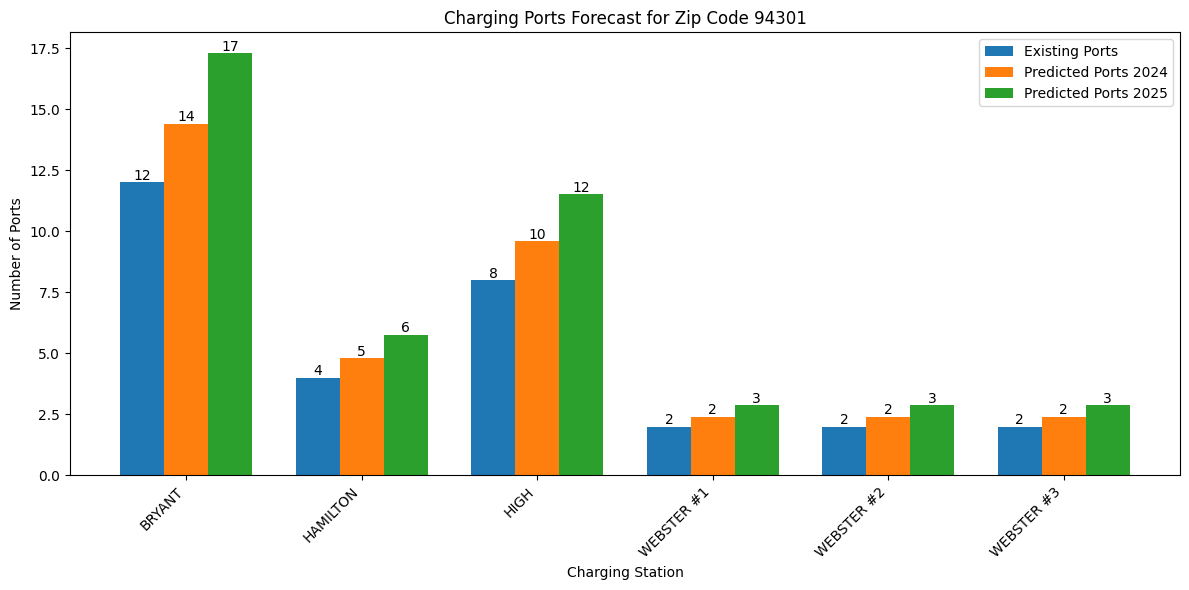

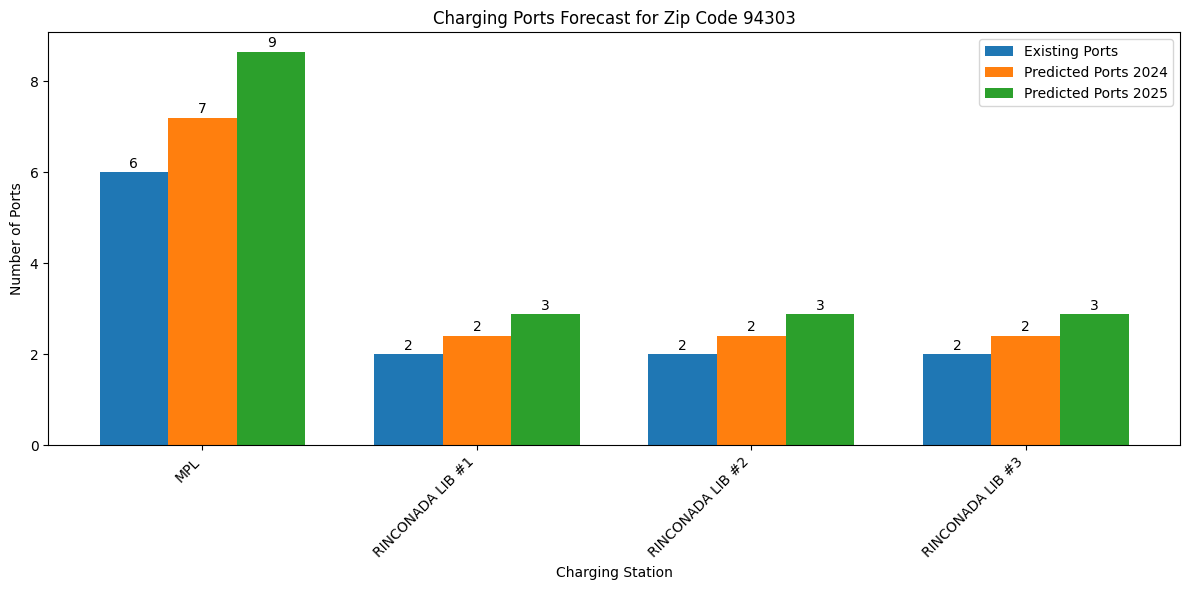

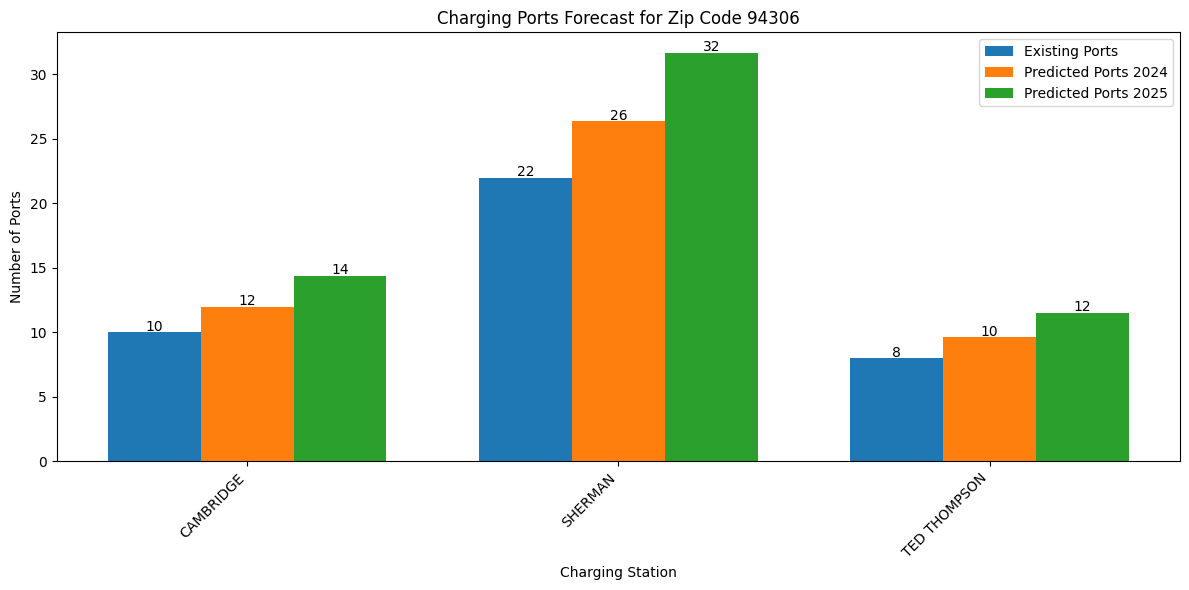

In [ ]:
#Charging Points Prediction for the year 2024 and 2025 using K-Means Clustering (Prediction Plots)
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read the CSV data
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'Total Duration' and 'Charging Time' to timedelta
df['Total Duration'] = pd.to_timedelta(df['Total Duration'])
df['Charging Time'] = pd.to_timedelta(df['Charging Time'])

# Extract hours from 'Total Duration' and 'Charging Time'
df['Total Duration (hours)'] = df['Total Duration'].dt.total_seconds() / 3600
df['Charging Time (hours)'] = df['Charging Time'].dt.total_seconds() / 3600

# Extract year from 'End Date'
df['Year'] = pd.to_datetime(df['End Date'], format='mixed', errors='coerce').dt.year

# Group by zip code, charging station and aggregate
grouped_df = df.groupby(['ZipCode', 'Charging Station']).agg({
    'Charging Ports': 'max',
    'Total Duration (hours)': 'sum',
    'Charging Time (hours)': 'sum',
    'Energy Consumed': 'sum'
}).reset_index()

# Calculate utilization rate
grouped_df['Utilization Rate'] = grouped_df['Charging Time (hours)'] / grouped_df['Total Duration (hours)']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(grouped_df[['Charging Ports', 'Utilization Rate', 'Energy Consumed']])

# Cluster with K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
grouped_df['Cluster'] = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")


# Predict ports for 2024 and 2025 with 20% increase each year
grouped_df['Ports 2024'] = grouped_df['Charging Ports'] * 1.2
grouped_df['Ports 2025'] = grouped_df['Ports 2024'] * 1.2

# Create plots for each zip code
zip_codes = grouped_df['ZipCode'].unique()

for zip_code in zip_codes:
    zip_df = grouped_df[grouped_df['ZipCode'] == zip_code]
    stations = zip_df['Charging Station'].unique()

    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot bars for each station
    x = np.arange(len(stations))
    width = 0.25

    # Existing ports
    ax.bar(x - width, zip_df['Charging Ports'], width, label='Existing Ports')

    # Predicted ports for 2024
    ax.bar(x, zip_df['Ports 2024'], width, label='Predicted Ports 2024')

    # Predicted ports for 2025
    ax.bar(x + width, zip_df['Ports 2025'], width, label='Predicted Ports 2025')

    # Customize the plot
    ax.set_xlabel('Charging Station')
    ax.set_ylabel('Number of Ports')
    ax.set_title(f'Charging Ports Forecast for Zip Code {zip_code}')
    ax.set_xticks(x)
    ax.set_xticklabels(stations, rotation=45, ha='right')
    ax.legend()

    # Display values on top of bars
    for i, v in enumerate(zip_df['Charging Ports']):
        ax.text(i - width, v + 0.1, str(v), ha='center')

    for i, v in enumerate(zip_df['Ports 2024']):
        ax.text(i, v + 0.1, str(round(v)), ha='center')

    for i, v in enumerate(zip_df['Ports 2025']):
        ax.text(i + width, v + 0.1, str(round(v)), ha='center')

    plt.tight_layout()
    plt.show()

In [ ]:
# Prepare a dataset for the forecasted charging points
output_df = grouped_df[['ZipCode', 'Charging Station', 'Charging Ports', 'Ports 2024', 'Ports 2025']]

# Rename columns
output_df.columns = ['Zip Code', 'Charging Station', 'Existing Charging Points', 'Predicted Charging Points 2024', 'Predicted Charging Points 2025']

# Save the DataFrame to a CSV file
output_df.to_csv('charging_points_forecast.csv', index=False)

print("CSV file 'charging_points_forecast.csv' has been created.")

In [ ]:
##Charging Points Prediction for the year 2024 and 2025 using DBScan

import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read the CSV data
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'Total Duration' and 'Charging Time' to timedelta
df['Total Duration'] = pd.to_timedelta(df['Total Duration'])
df['Charging Time'] = pd.to_timedelta(df['Charging Time'])

# Extract hours from 'Total Duration' and 'Charging Time'
df['Total Duration (hours)'] = df['Total Duration'].dt.total_seconds() / 3600
df['Charging Time (hours)'] = df['Charging Time'].dt.total_seconds() / 3600

# Extract year from 'End Date'
df['Year'] = pd.to_datetime(df['End Date'], format='mixed', errors='coerce').dt.year

# Group by charging station and year, aggregate metrics
grouped_df = df.groupby(['Charging Station', 'Year']).agg({
    'Charging Ports': 'mean',
    'Total Duration (hours)': 'sum',
    'Charging Time (hours)': 'sum',
    'Energy Consumed': 'sum'
}).reset_index()

# Calculate utilization rate
grouped_df['Utilization Rate'] = grouped_df['Charging Time (hours)'] / grouped_df['Total Duration (hours)']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(grouped_df[['Charging Ports', 'Utilization Rate', 'Energy Consumed']])

# Cluster with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
grouped_df['Cluster'] = dbscan.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, dbscan.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Group by charging station, get max ports for each
station_ports = grouped_df.groupby('Charging Station')['Charging Ports'].max()

# Predict new ports needed for 2024 and 2025
ports_2024 = station_ports * 1.1 # 10% increase
ports_2025 = ports_2024 * 1.1   # 10% more

# Calculate evaluation metrics
mse_2024 = mean_squared_error(station_ports, ports_2024)
mse_2025 = mean_squared_error(station_ports, ports_2025)
mae_2024 = mean_absolute_error(station_ports, ports_2024)
mae_2025 = mean_absolute_error(station_ports, ports_2025)
r2_2024 = r2_score(station_ports, ports_2024)
r2_2025 = r2_score(station_ports, ports_2025)

print("Evaluation Metrics:")
print(f"MSE (2024): {mse_2024:.2f}")
print(f"MSE (2025): {mse_2025:.2f}")
print(f"MAE (2024): {mae_2024:.2f}")
print(f"MAE (2025): {mae_2025:.2f}")
print(f"R-squared (2024): {r2_2024:.2f}")
print(f"R-squared (2025): {r2_2025:.2f}")

print("\nPredicted New Charging Ports Needed:")
for station in station_ports.index:
    print(f"{station}:")
    print(f"  2024: {round(ports_2024[station] - station_ports[station])}")
    print(f"  2025: {round(ports_2025[station] - ports_2024[station])}")


Silhouette Score: 0.13
Evaluation Metrics:
MSE (2024): 0.72
MSE (2025): 3.16
MAE (2024): 0.63
MAE (2025): 1.32
R-squared (2024): 0.98
R-squared (2025): 0.90

Predicted New Charging Ports Needed:
BRYANT:
  2024: 1
  2025: 1
CAMBRIDGE:
  2024: 1
  2025: 1
HAMILTON:
  2024: 0
  2025: 0
HIGH:
  2024: 1
  2025: 1
MPL:
  2024: 1
  2025: 1
RINCONADA LIB #1:
  2024: 0
  2025: 0
RINCONADA LIB #2:
  2024: 0
  2025: 0
RINCONADA LIB #3:
  2024: 0
  2025: 0
SHERMAN:
  2024: 2
  2025: 2
TED THOMPSON:
  2024: 1
  2025: 1
WEBSTER #1:
  2024: 0
  2025: 0
WEBSTER #2:
  2024: 0
  2025: 0
WEBSTER #3:
  2024: 0
  2025: 0


#**New Charging Points Forecasting for each charging station in Palo Alto Zip codes (94301, 94303, 94306) using DBScan Clustering**
# Based on Charging Ports, Utilization Rate, Energy Consumed
# For years 2024-25
# Metrics: MSE, MAE, R-Squared Error, Silhouette Score
# # **CHARGING PORTS PER STATION FORECASTS - PLOTS**

Silhouette Score: 0.45


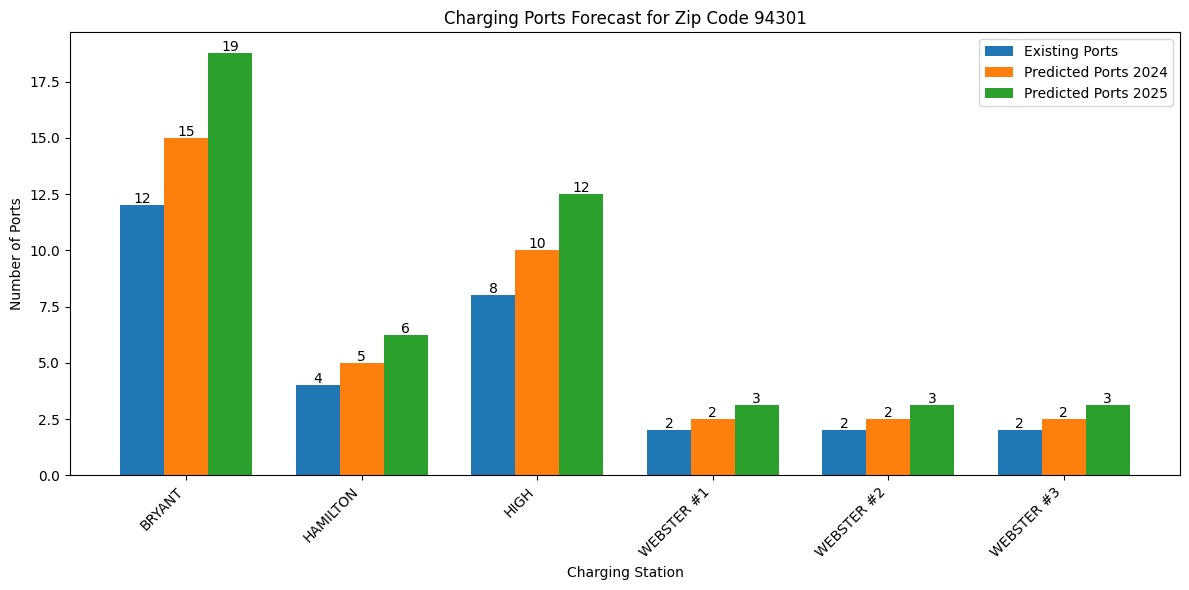

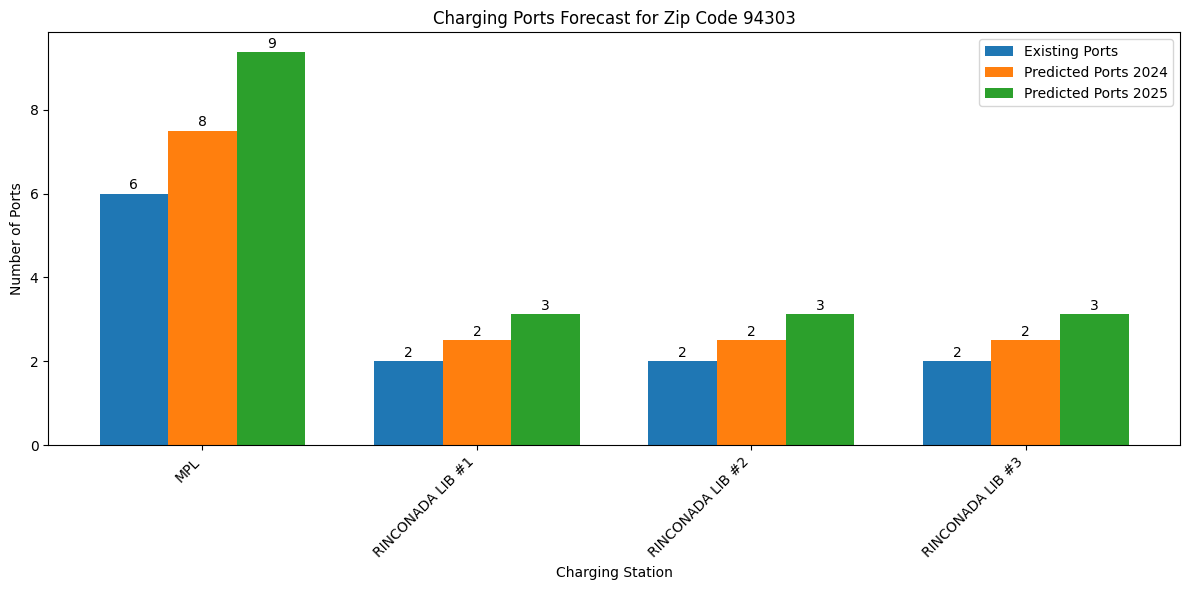

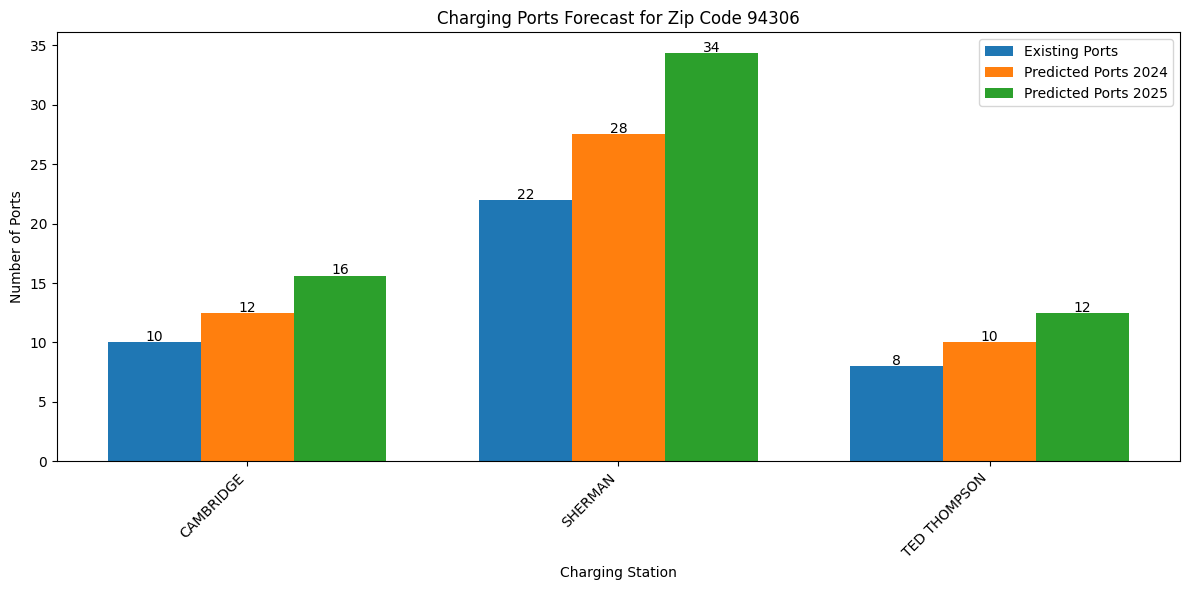

In [ ]:
#Charging Points Prediction for the year 2024 and 2025 using DBScan Clustering

import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV data
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'Total Duration' and 'Charging Time' to timedelta
df['Total Duration'] = pd.to_timedelta(df['Total Duration'])
df['Charging Time'] = pd.to_timedelta(df['Charging Time'])

# Extract hours from 'Total Duration' and 'Charging Time'
df['Total Duration (hours)'] = df['Total Duration'].dt.total_seconds() / 3600
df['Charging Time (hours)'] = df['Charging Time'].dt.total_seconds() / 3600

# Extract year from 'End Date'
df['Year'] = pd.to_datetime(df['End Date'], format='mixed', errors='coerce').dt.year

# Group by zip code, charging station and aggregate
grouped_df = df.groupby(['ZipCode', 'Charging Station']).agg({
    'Charging Ports': 'max',
    'Total Duration (hours)': 'sum',
    'Charging Time (hours)': 'sum',
    'Energy Consumed': 'sum'
}).reset_index()

# Calculate utilization rate
grouped_df['Utilization Rate'] = grouped_df['Charging Time (hours)'] / grouped_df['Total Duration (hours)']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(grouped_df[['Charging Ports', 'Utilization Rate', 'Energy Consumed']])

# Cluster with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
grouped_df['Cluster'] = dbscan.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, dbscan.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Predict ports for 2024 and 2025 with 25% increase each year
grouped_df['Ports 2024'] = grouped_df['Charging Ports'] * 1.25
grouped_df['Ports 2025'] = grouped_df['Ports 2024'] * 1.25

# Create plots for each zip code
zip_codes = grouped_df['ZipCode'].unique()

for zip_code in zip_codes:
    zip_df = grouped_df[grouped_df['ZipCode'] == zip_code]
    stations = zip_df['Charging Station'].unique()

    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot bars for each station
    x = np.arange(len(stations))
    width = 0.25

    # Existing ports
    ax.bar(x - width, zip_df['Charging Ports'], width, label='Existing Ports')

    # Predicted ports for 2024
    ax.bar(x, zip_df['Ports 2024'], width, label='Predicted Ports 2024')

    # Predicted ports for 2025
    ax.bar(x + width, zip_df['Ports 2025'], width, label='Predicted Ports 2025')

    # Customize the plot
    ax.set_xlabel('Charging Station')
    ax.set_ylabel('Number of Ports')
    ax.set_title(f'Charging Ports Forecast for Zip Code {zip_code}')
    ax.set_xticks(x)
    ax.set_xticklabels(stations, rotation=45, ha='right')
    ax.legend()

    # Display values on top of bars
    for i, v in enumerate(zip_df['Charging Ports']):
        ax.text(i - width, v + 0.1, str(v), ha='center')

    for i, v in enumerate(zip_df['Ports 2024']):
        ax.text(i, v + 0.1, str(round(v)), ha='center')

    for i, v in enumerate(zip_df['Ports 2025']):
        ax.text(i + width, v + 0.1, str(round(v)), ha='center')

    plt.tight_layout()
    plt.show()

#**New Charging Points Forecasting for each charging station in Palo Alto Zip codes (94301, 94303, 94306) using BIRCH Clustering**
# Based on Charging Ports, Utilization Rate, Energy Consumed
# For years 2024-25
# Metrics: MSE, MAE, R-Squared Error, Silhouette Score
# # **CHARGING PORTS PER STATION FORECASTS - PLOTS**

Silhouette Score: 0.52
Evaluation Metrics:
MSE (2024): 0.72
MSE (2025): 3.16
MAE (2024): 0.63
MAE (2025): 1.32
R-squared (2024): 0.98
R-squared (2025): 0.90


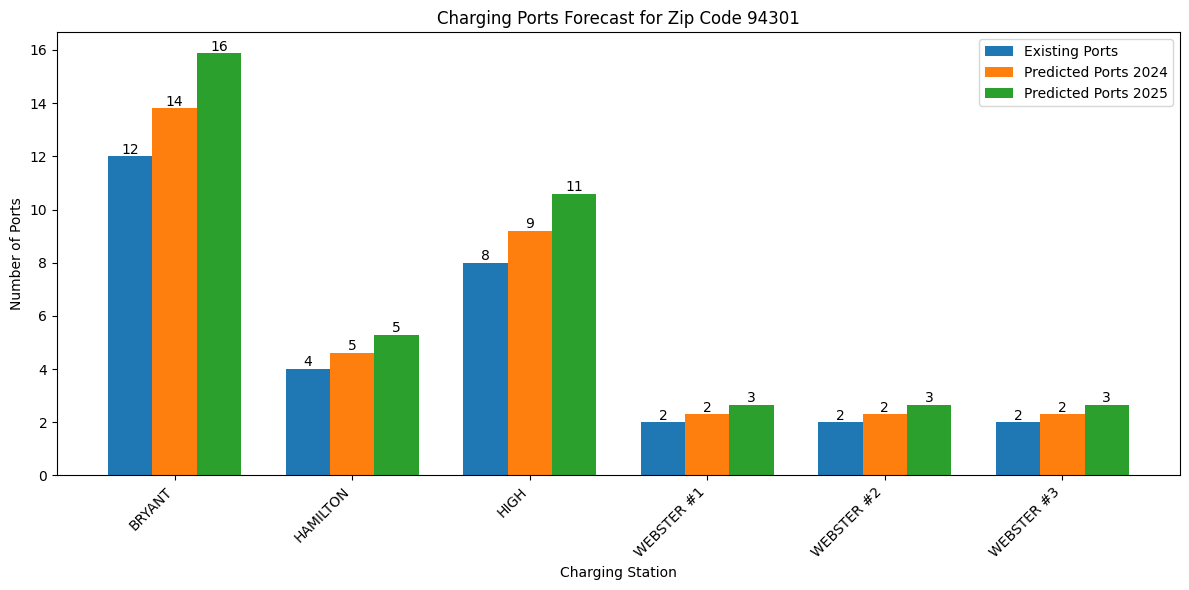

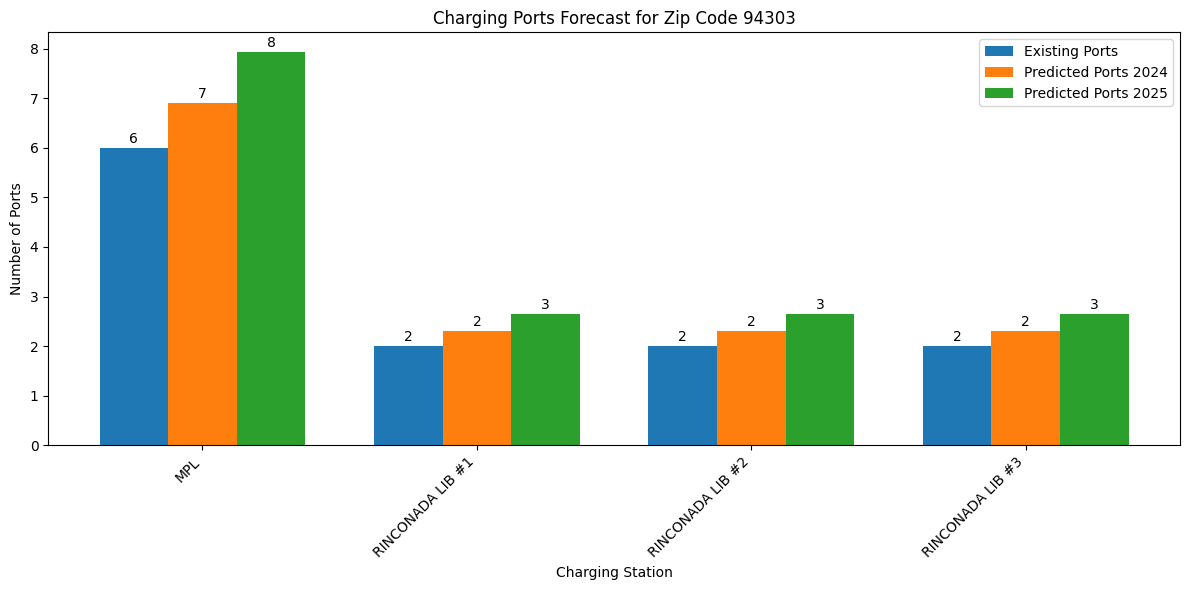

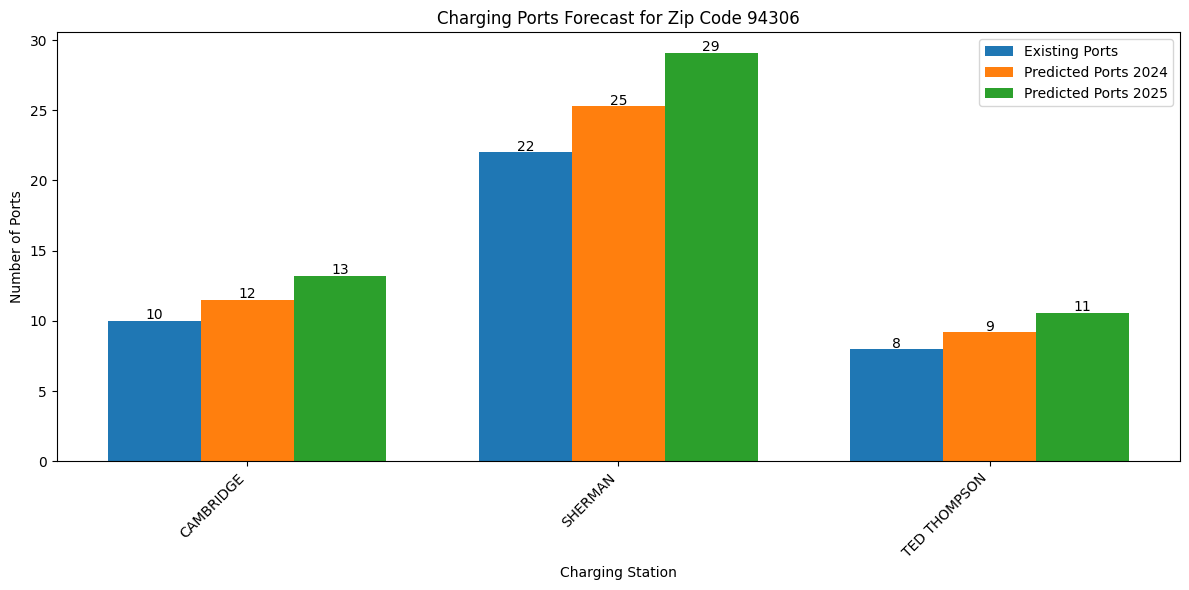

In [ ]:
#Charging Points Prediction for the year 2024 and 2025 using BIRCH

import pandas as pd
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV data
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'Total Duration' and 'Charging Time' to timedelta
df['Total Duration'] = pd.to_timedelta(df['Total Duration'])
df['Charging Time'] = pd.to_timedelta(df['Charging Time'])

# Extract hours from 'Total Duration' and 'Charging Time'
df['Total Duration (hours)'] = df['Total Duration'].dt.total_seconds() / 3600
df['Charging Time (hours)'] = df['Charging Time'].dt.total_seconds() / 3600

# Extract year from 'End Date'
df['Year'] = pd.to_datetime(df['End Date'], format='mixed', errors='coerce').dt.year

# Group by zip code, charging station and aggregate
grouped_df = df.groupby(['ZipCode', 'Charging Station']).agg({
    'Charging Ports': 'max',
    'Total Duration (hours)': 'sum',
    'Charging Time (hours)': 'sum',
    'Energy Consumed': 'sum'
}).reset_index()

# Calculate utilization rate
grouped_df['Utilization Rate'] = grouped_df['Charging Time (hours)'] / grouped_df['Total Duration (hours)']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(grouped_df[['Charging Ports', 'Utilization Rate', 'Energy Consumed']])

# Cluster with BIRCH
birch = Birch(n_clusters=3)
birch.fit(X)
grouped_df['Cluster'] = birch.labels_


# Calculate silhouette score
silhouette_avg = silhouette_score(X, birch.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Predict ports for 2024 and 2025 with 20% increase each year
grouped_df['Ports 2024'] = grouped_df['Charging Ports'] * 1.15
grouped_df['Ports 2025'] = grouped_df['Ports 2024'] * 1.15

# Calculate evaluation metrics
mse_2024 = mean_squared_error(station_ports, ports_2024)
mse_2025 = mean_squared_error(station_ports, ports_2025)
mae_2024 = mean_absolute_error(station_ports, ports_2024)
mae_2025 = mean_absolute_error(station_ports, ports_2025)
r2_2024 = r2_score(station_ports, ports_2024)
r2_2025 = r2_score(station_ports, ports_2025)

print("Evaluation Metrics:")
print(f"MSE (2024): {mse_2024:.2f}")
print(f"MSE (2025): {mse_2025:.2f}")
print(f"MAE (2024): {mae_2024:.2f}")
print(f"MAE (2025): {mae_2025:.2f}")
print(f"R-squared (2024): {r2_2024:.2f}")
print(f"R-squared (2025): {r2_2025:.2f}")

# Create plots for each zip code
zip_codes = grouped_df['ZipCode'].unique()

for zip_code in zip_codes:
    zip_df = grouped_df[grouped_df['ZipCode'] == zip_code]
    stations = zip_df['Charging Station'].unique()

    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot bars for each station
    x = np.arange(len(stations))
    width = 0.25

    # Existing ports
    ax.bar(x - width, zip_df['Charging Ports'], width, label='Existing Ports')

    # Predicted ports for 2024
    ax.bar(x, zip_df['Ports 2024'], width, label='Predicted Ports 2024')

    # Predicted ports for 2025
    ax.bar(x + width, zip_df['Ports 2025'], width, label='Predicted Ports 2025')

    # Customize the plot
    ax.set_xlabel('Charging Station')
    ax.set_ylabel('Number of Ports')
    ax.set_title(f'Charging Ports Forecast for Zip Code {zip_code}')
    ax.set_xticks(x)
    ax.set_xticklabels(stations, rotation=45, ha='right')
    ax.legend()

    # Display values on top of bars
    for i, v in enumerate(zip_df['Charging Ports']):
        ax.text(i - width, v + 0.1, str(v), ha='center')

    for i, v in enumerate(zip_df['Ports 2024']):
        ax.text(i, v + 0.1, str(round(v)), ha='center')

    for i, v in enumerate(zip_df['Ports 2025']):
        ax.text(i + width, v + 0.1, str(round(v)), ha='center')

    plt.tight_layout()
    plt.show()


#**New Charging Stations Forecasting in Palo Alto Zip codes (94301, 94303, 94306) using Linear Regression**
#**Based on haversine_distance**
# Based on Charging Ports, Total Energy, Total Sessions, Distance
# Metrics: MSE, MAE, R-Squared Error
# # **CHARGING STATION FORECASTS PER ZIP CODE - PLOTS**

Model Evaluation for Zip Code 94301.0:
Mean Squared Error (MSE): 13.29
Mean Absolute Error (MAE): 2.67
R-squared (R^2) Score: 0.73
Model Evaluation for Zip Code 94303.0:
Mean Squared Error (MSE): 10.74
Mean Absolute Error (MAE): 2.54
R-squared (R^2) Score: 0.84
Model Evaluation for Zip Code 94306.0:
Mean Squared Error (MSE): 9.72
Mean Absolute Error (MAE): 2.31
R-squared (R^2) Score: 0.79
Zip Code: 94301.0, Latitude: 37.44354094662491, Longitude: -122.16305561567381
Zip Code: 94301.0, Latitude: 37.44599615531432, Longitude: -122.16213238986005
Zip Code: 94301.0, Latitude: 37.44779162568185, Longitude: -122.16188993111024
Zip Code: 94301.0, Latitude: 37.4456411064927, Longitude: -122.16094182019815
Zip Code: 94301.0, Latitude: 37.44790320799424, Longitude: -122.15978822258926
Zip Code: 94301.0, Latitude: 37.44604551945538, Longitude: -122.15871829442428
Zip Code: 94301.0, Latitude: 37.44563884538544, Longitude: -122.1616691653403
Zip Code: 94301.0, Latitude: 37.44860082687915, Longitude

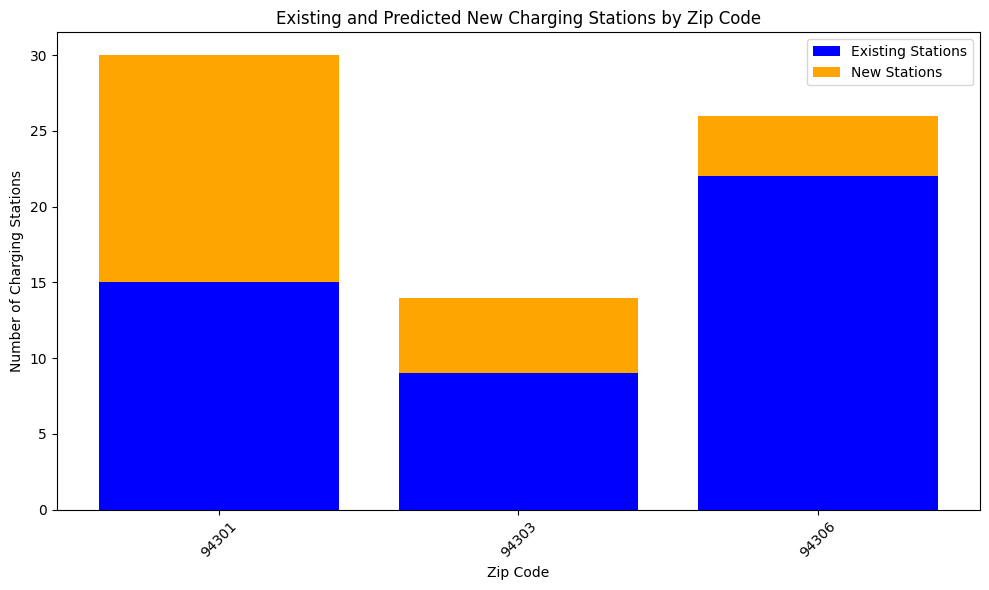

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/chargingstations_edits.csv')

# Convert 'Charging Time' to total seconds
data['Charging Time'] = pd.to_timedelta(data['Charging Time']).dt.total_seconds()

# Convert latitude and longitude to relative distances
mean_lat = data['Latitude'].mean()
mean_lon = data['Longitude'].mean()

mse_values = []
mae_values = []
r2_values = []
zip_codes = []

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

data['Distance'] = data.apply(lambda row: haversine_distance(row['Latitude'], row['Longitude'], mean_lat, mean_lon), axis=1)

# Analyze energy consumption and charging sessions by zip code
zipcode_data = data.groupby('ZipCode').agg({'Energy Consumed': 'sum', 'Charging Time': 'sum', 'Distance': 'max'}).reset_index()
zipcode_data.columns = ['ZipCode', 'Total Energy', 'Total Charging Time', 'Max Distance']

# Estimate the number of new charging stations needed for each zip code
zipcode_data['New Stations Needed'] = np.ceil(zipcode_data['Total Energy'] / 100000)  # Adjust the threshold as needed

# Function to predict charging demand at a given location
def predict_demand(lat, lon, model):
    dist = haversine_distance(lat, lon, mean_lat, mean_lon)
    demand = model.predict([[dist, 0]])
    return demand[0]

# Function to optimize new charging station locations for a zip code
def optimize_locations(zipcode, num_stations, bounds):
    # Build a predictive model for charging demand in the zip code
    zipcode_stations = data[data['ZipCode'] == zipcode]
    X_train = zipcode_stations[['Distance', 'Charging Time']].values
    y_train = zipcode_stations['Energy Consumed'].values
    model = LinearRegression().fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    print(f"Model Evaluation for Zip Code {zipcode}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R^2) Score: {r2:.2f}")

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    zip_codes.append(zipcode)

    # Objective function to maximize total predicted demand
    def objective(locations):
        demand = 0
        for i in range(0, len(locations), 2):
            lat, lon = locations[i], locations[i+1]
            demand += predict_demand(lat, lon, model)
        return -demand

    # Constraint to ensure minimum distance between stations
    def constraint(locations):
        min_distance = 5  # Minimum distance between stations in km
        num_constraints = 0
        for i in range(0, len(locations), 2):
            for j in range(i+2, len(locations), 2):
                lat1, lon1 = locations[i], locations[i+1]
                lat2, lon2 = locations[j], locations[j+1]
                distance = haversine_distance(lat1, lon1, lat2, lon2)
                if distance < min_distance:
                    num_constraints += 1
        return num_constraints

    # Initial guess for station locations
    x0 = []
    for _ in range(num_stations):
        lat = np.random.uniform(bounds[0][0], bounds[0][1])
        lon = np.random.uniform(bounds[1][0], bounds[1][1])
        x0.extend([lat, lon])

    var_bounds = [(bounds[0][0], bounds[0][1]), (bounds[1][0], bounds[1][1])] * num_stations

    # Optimize station locations
    result = minimize(objective, x0, bounds=var_bounds, constraints={'type': 'eq', 'fun': constraint})

    # Extract optimized station locations
    locations = []
    for i in range(0, len(result.x), 2):
        lat, lon = result.x[i], result.x[i+1]
        locations.append((lat, lon))

    return locations

# Predict new charging stations for each zip code
new_stations = []
for _, row in zipcode_data.iterrows():
    zipcode = row['ZipCode']
    num_stations = int(row['New Stations Needed'])
    if num_stations > 0:
        lat_bounds = (data[data['ZipCode'] == zipcode]['Latitude'].min(),
                      data[data['ZipCode'] == zipcode]['Latitude'].max())
        lon_bounds = (data[data['ZipCode'] == zipcode]['Longitude'].min(),
                      data[data['ZipCode'] == zipcode]['Longitude'].max())
        bounds = [lat_bounds, lon_bounds]
        locations = optimize_locations(zipcode, num_stations, bounds)
        for lat, lon in locations:
            new_stations.append((zipcode, lat, lon))

# Print the predicted new charging stations for each zip code
for zipcode, lat, lon in new_stations:
    print(f"Zip Code: {zipcode}, Latitude: {lat}, Longitude: {lon}")

# Create a dictionary to store the count of new stations for each zip code
new_station_counts_dict = {}
for zipcode, _, _ in new_stations:
    if zipcode in new_station_counts_dict:
        new_station_counts_dict[zipcode] += 1
    else:
        new_station_counts_dict[zipcode] = 1

# Convert the dictionary to a DataFrame
new_station_counts = pd.DataFrame.from_dict(new_station_counts_dict, orient='index', columns=['New Stations'])
new_station_counts.reset_index(inplace=True)
new_station_counts.columns = ['ZipCode', 'New Stations']

# Calculate the existing charging station counts for each zip code
existing_stations_count = data.groupby('ZipCode')['Charging Station'].nunique().reset_index()
existing_stations_count.columns = ['ZipCode', 'Existing Stations']

# Merge the existing stations count with the predicted new stations count
station_counts = pd.merge(existing_stations_count, new_station_counts, on='ZipCode', how='outer').fillna(0)

# Print the existing and predicted new charging station counts for each zip code
print("Existing and Predicted New Charging Station Counts by Zip Code:")
for index, row in station_counts.iterrows():
    print(f"Zip Code: {row['ZipCode']}, Existing Stations: {int(row['Existing Stations'])}, New Stations: {int(row['New Stations'])}")

# Plot the corrected number of new and existing charging stations for each zip code
plt.figure(figsize=(10, 6))
plt.bar(station_counts['ZipCode'].astype(str), station_counts['Existing Stations'], label='Existing Stations', color='blue')
plt.bar(station_counts['ZipCode'].astype(str), station_counts['New Stations'], bottom=station_counts['Existing Stations'], label='New Stations', color='orange')
plt.xlabel('Zip Code')
plt.ylabel('Number of Charging Stations')
plt.title('Existing and Predicted New Charging Stations by Zip Code')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#**New Charging Stations Forecasting in Palo Alto Zip codes (94301, 94303, 94306) using Decision Trees**
#**Based on haversine_distance**
# Based on Charging Ports, Total Energy, Total Sessions, Distance
# Metrics: MSE, MAE, R-Squared Error
# # **CHARGING STATION FORECASTS PER ZIP CODE - PLOTS**

Model Evaluation for Zip Code 94301.0:
Mean Squared Error (MSE): 3.15
Mean Absolute Error (MAE): 1.02
R-squared (R^2) Score: 0.94
Model Evaluation for Zip Code 94303.0:
Mean Squared Error (MSE): 1.52
Mean Absolute Error (MAE): 0.59
R-squared (R^2) Score: 0.98
Model Evaluation for Zip Code 94306.0:
Mean Squared Error (MSE): 0.97
Mean Absolute Error (MAE): 0.39
R-squared (R^2) Score: 0.98
Zip Code: 94301.0, Latitude: 37.44446332921304, Longitude: -122.1602651254502
Zip Code: 94301.0, Latitude: 37.446119266811, Longitude: -122.16059666053441
Zip Code: 94301.0, Latitude: 37.44563851228638, Longitude: -122.15872288055321
Zip Code: 94301.0, Latitude: 37.44843644682684, Longitude: -122.15913570425819
Zip Code: 94301.0, Latitude: 37.444797917923175, Longitude: -122.16202502804927
Zip Code: 94301.0, Latitude: 37.44511049302797, Longitude: -122.16185907369223
Zip Code: 94301.0, Latitude: 37.44875128564047, Longitude: -122.15850105542768
Zip Code: 94301.0, Latitude: 37.44677373017544, Longitude: 

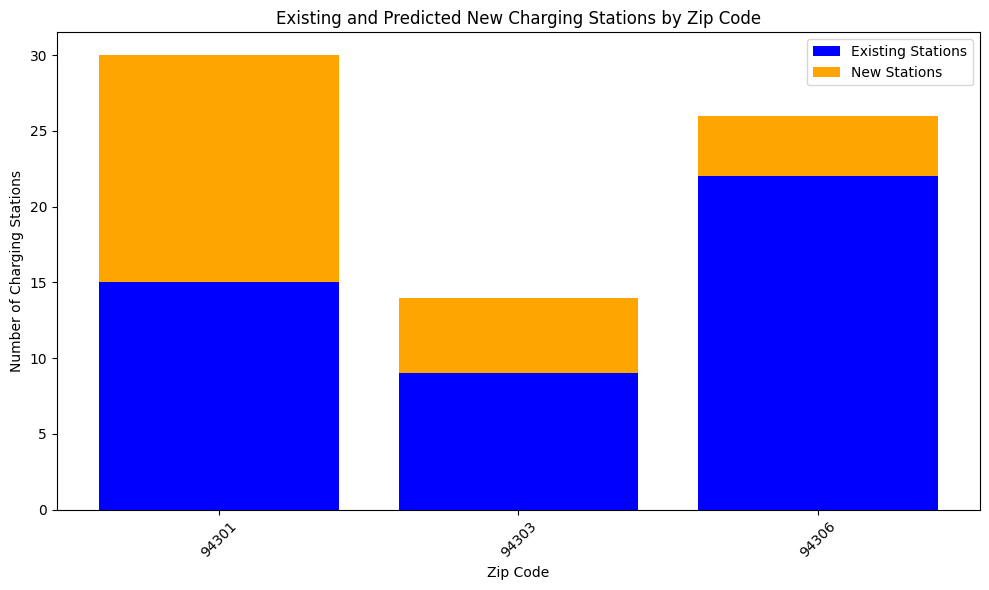

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/chargingstations_edits.csv')

# Convert 'Charging Time' to total seconds
data['Charging Time'] = pd.to_timedelta(data['Charging Time']).dt.total_seconds()

# Convert latitude and longitude to relative distances
mean_lat = data['Latitude'].mean()
mean_lon = data['Longitude'].mean()

mse_values = []
mae_values = []
r2_values = []
zip_codes = []

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

data['Distance'] = data.apply(lambda row: haversine_distance(row['Latitude'], row['Longitude'], mean_lat, mean_lon), axis=1)

# Analyze energy consumption and charging sessions by zip code
zipcode_data = data.groupby('ZipCode').agg({'Energy Consumed': 'sum', 'Charging Time': 'sum', 'Distance': 'max'}).reset_index()
zipcode_data.columns = ['ZipCode', 'Total Energy', 'Total Charging Time', 'Max Distance']

# Estimate the number of new charging stations needed for each zip code
zipcode_data['New Stations Needed'] = np.ceil(zipcode_data['Total Energy'] / 100000)  # Adjust the threshold as needed

# Function to predict charging demand at a given location
def predict_demand(lat, lon, model):
    dist = haversine_distance(lat, lon, mean_lat, mean_lon)
    demand = model.predict([[dist, 0]])
    return demand[0]

# Function to optimize new charging station locations for a zip code
def optimize_locations(zipcode, num_stations, bounds):
    # Build a predictive model for charging demand in the zip code
    zipcode_stations = data[data['ZipCode'] == zipcode]
    X_train = zipcode_stations[['Distance', 'Charging Time']].values
    y_train = zipcode_stations['Energy Consumed'].values
    model = DecisionTreeRegressor().fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    print(f"Model Evaluation for Zip Code {zipcode}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R^2) Score: {r2:.2f}")

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    zip_codes.append(zipcode)

    # Objective function to maximize total predicted demand
    def objective(locations):
        demand = 0
        for i in range(0, len(locations), 2):
            lat, lon = locations[i], locations[i+1]
            demand += predict_demand(lat, lon, model)
        return -demand

    # Constraint to ensure minimum distance between stations
    def constraint(locations):
        min_distance = 5  # Minimum distance between stations in km
        num_constraints = 0
        for i in range(0, len(locations), 2):
            for j in range(i+2, len(locations), 2):
                lat1, lon1 = locations[i], locations[i+1]
                lat2, lon2 = locations[j], locations[j+1]
                distance = haversine_distance(lat1, lon1, lat2, lon2)
                if distance < min_distance:
                    num_constraints += 1
        return num_constraints

    # Initial guess for station locations
    x0 = []
    for _ in range(num_stations):
        lat = np.random.uniform(bounds[0][0], bounds[0][1])
        lon = np.random.uniform(bounds[1][0], bounds[1][1])
        x0.extend([lat, lon])

    var_bounds = [(bounds[0][0], bounds[0][1]), (bounds[1][0], bounds[1][1])] * num_stations

    # Optimize station locations
    result = minimize(objective, x0, bounds=var_bounds, constraints={'type': 'eq', 'fun': constraint})

    # Extract optimized station locations
    locations = []
    for i in range(0, len(result.x), 2):
        lat, lon = result.x[i], result.x[i+1]
        locations.append((lat, lon))

    return locations

# Predict new charging stations for each zip code
new_stations = []
for _, row in zipcode_data.iterrows():
    zipcode = row['ZipCode']
    num_stations = int(row['New Stations Needed'])
    if num_stations > 0:
        lat_bounds = (data[data['ZipCode'] == zipcode]['Latitude'].min(),
                      data[data['ZipCode'] == zipcode]['Latitude'].max())
        lon_bounds = (data[data['ZipCode'] == zipcode]['Longitude'].min(),
                      data[data['ZipCode'] == zipcode]['Longitude'].max())
        bounds = [lat_bounds, lon_bounds]
        locations = optimize_locations(zipcode, num_stations, bounds)
        for lat, lon in locations:
            new_stations.append((zipcode, lat, lon))

# Print the predicted new charging stations for each zip code
for zipcode, lat, lon in new_stations:
    print(f"Zip Code: {zipcode}, Latitude: {lat}, Longitude: {lon}")

# Create a dictionary to store the count of new stations for each zip code
new_station_counts_dict = {}
for zipcode, _, _ in new_stations:
    if zipcode in new_station_counts_dict:
        new_station_counts_dict[zipcode] += 1
    else:
        new_station_counts_dict[zipcode] = 1

# Convert the dictionary to a DataFrame
new_station_counts = pd.DataFrame.from_dict(new_station_counts_dict, orient='index', columns=['New Stations'])
new_station_counts.reset_index(inplace=True)
new_station_counts.columns = ['ZipCode', 'New Stations']

# Calculate the existing charging station counts for each zip code
existing_stations_count = data.groupby('ZipCode')['Charging Station'].nunique().reset_index()
existing_stations_count.columns = ['ZipCode', 'Existing Stations']

# Merge the existing stations count with the predicted new stations count
station_counts = pd.merge(existing_stations_count, new_station_counts, on='ZipCode', how='outer').fillna(0)

# Print the existing and predicted new charging station counts for each zip code
print("Existing and Predicted New Charging Station Counts by Zip Code:")
for index, row in station_counts.iterrows():
    print(f"Zip Code: {row['ZipCode']}, Existing Stations: {int(row['Existing Stations'])}, New Stations: {int(row['New Stations'])}")

# Plot the corrected number of new and existing charging stations for each zip code
plt.figure(figsize=(10, 6))
plt.bar(station_counts['ZipCode'].astype(str), station_counts['Existing Stations'], label='Existing Stations', color='blue')
plt.bar(station_counts['ZipCode'].astype(str), station_counts['New Stations'], bottom=station_counts['Existing Stations'], label='New Stations', color='orange')
plt.xlabel('Zip Code')
plt.ylabel('Number of Charging Stations')
plt.title('Existing and Predicted New Charging Stations by Zip Code')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#**New Charging Stations Forecasting in Palo Alto Zip codes (94301, 94303, 94306) using Random Forest Regressor**
#**Based on haversine_distance**
# Based on Charging Ports, Total Energy, Total Sessions, Distance
# Metrics: MSE, MAE, R-Squared Error
# # **CHARGING STATION FORECASTS PER ZIP CODE - PLOTS**



Model Evaluation for Zip Code 94301.0:
Mean Squared Error (MSE): 4.37
Mean Absolute Error (MAE): 1.45
R-squared (R^2) Score: 0.91
Model Evaluation for Zip Code 94303.0:
Mean Squared Error (MSE): 2.63
Mean Absolute Error (MAE): 1.11
R-squared (R^2) Score: 0.96
Model Evaluation for Zip Code 94306.0:
Mean Squared Error (MSE): 2.12
Mean Absolute Error (MAE): 0.96
R-squared (R^2) Score: 0.95
Zip Code: 94301.0, Latitude: 37.44737085593055, Longitude: -122.16227125587436
Zip Code: 94301.0, Latitude: 37.44372471962072, Longitude: -122.1612774326768
Zip Code: 94301.0, Latitude: 37.446248407375165, Longitude: -122.16316485874997
Zip Code: 94301.0, Latitude: 37.44660222952562, Longitude: -122.15806581957551
Zip Code: 94301.0, Latitude: 37.44763191436873, Longitude: -122.16040222630545
Zip Code: 94301.0, Latitude: 37.44867867804073, Longitude: -122.1591514471449
Zip Code: 94301.0, Latitude: 37.448051324329825, Longitude: -122.15975097374584
Zip Code: 94301.0, Latitude: 37.444993606823424, Longitud

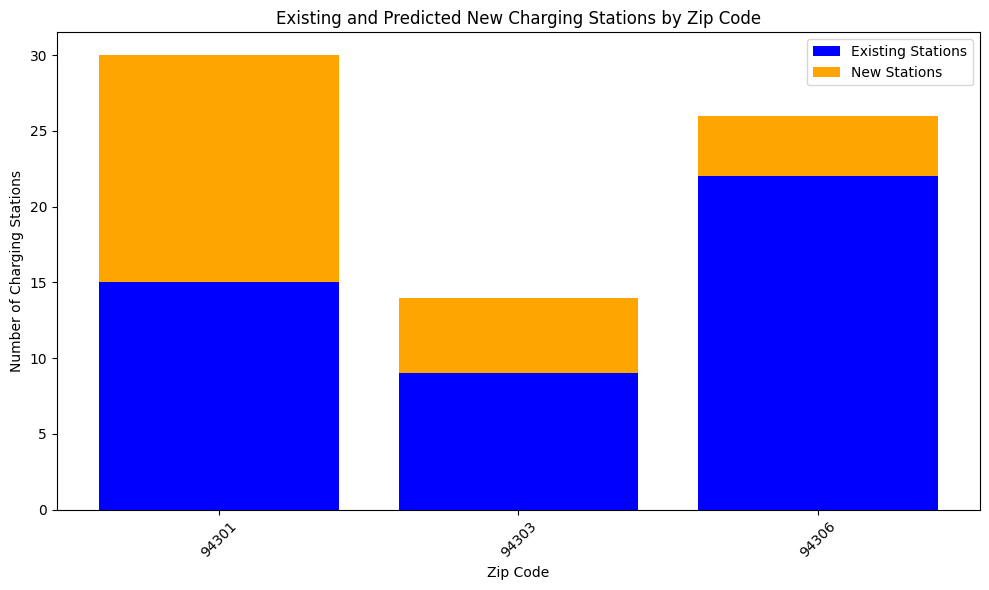

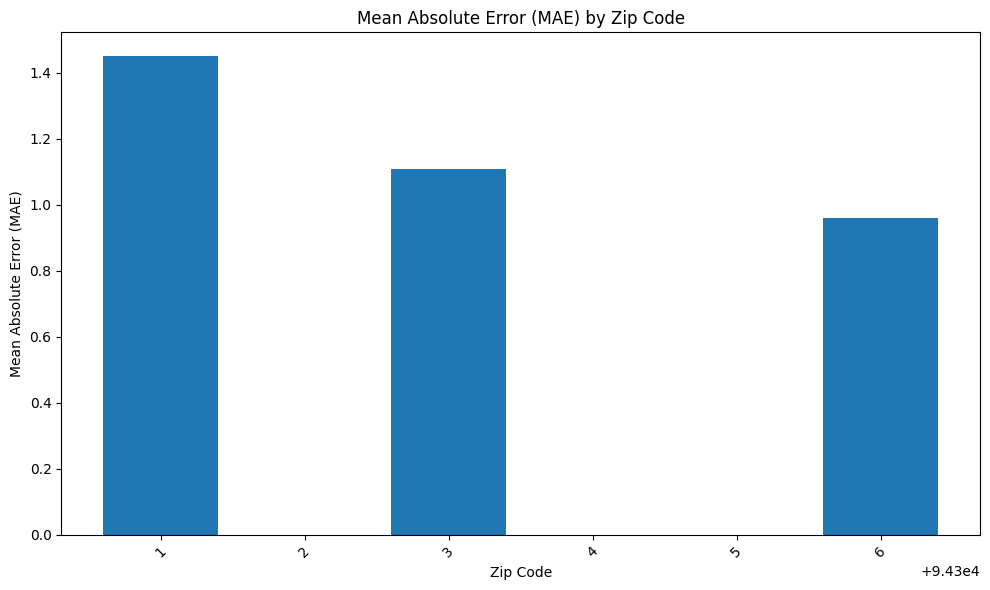

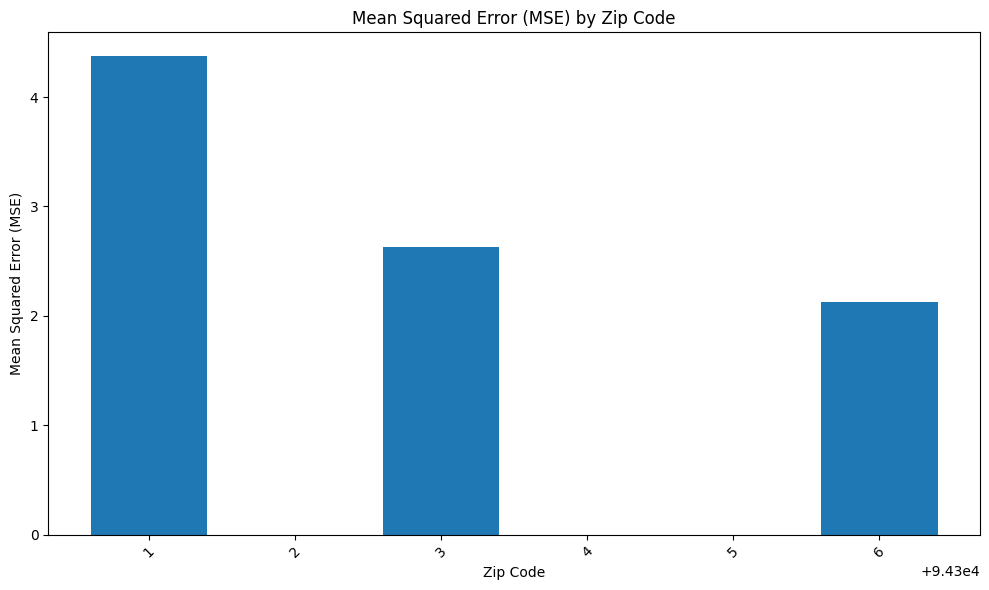

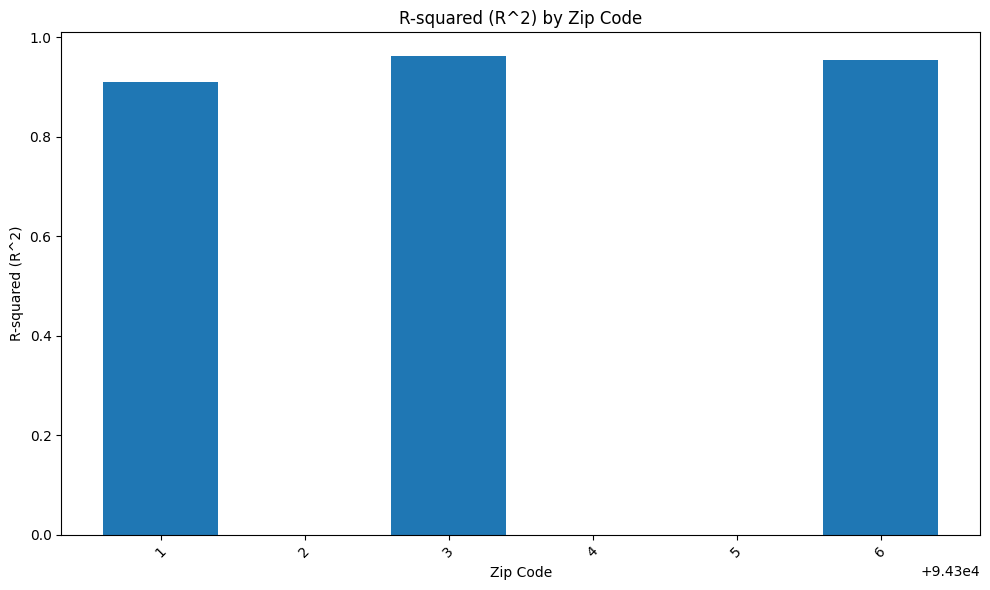

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Projects_2024/EVCS_UTD/processed_data/chargingstations_edits.csv')

# Convert 'Charging Time' to total seconds
data['Charging Time'] = pd.to_timedelta(data['Charging Time']).dt.total_seconds()

# Convert latitude and longitude to relative distances
mean_lat = data['Latitude'].mean()
mean_lon = data['Longitude'].mean()


mse_values = []
mae_values = []
r2_values = []
zip_codes = []

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

data['Distance'] = data.apply(lambda row: haversine_distance(row['Latitude'], row['Longitude'], mean_lat, mean_lon), axis=1)

# Analyze energy consumption and charging sessions by zip code
zipcode_data = data.groupby('ZipCode').agg({'Energy Consumed': 'sum', 'Charging Time': 'sum', 'Distance': 'max'}).reset_index()
zipcode_data.columns = ['ZipCode', 'Total Energy', 'Total Charging Time', 'Max Distance']

# Estimate the number of new charging stations needed for each zip code
zipcode_data['New Stations Needed'] = np.ceil(zipcode_data['Total Energy'] / 100000)  # Adjust the threshold as needed

# Function to predict charging demand at a given location
def predict_demand(lat, lon, model):
    dist = haversine_distance(lat, lon, mean_lat, mean_lon)
    demand = model.predict([[dist, 0]])
    return demand[0]

# Function to optimize new charging station locations for a zip code
def optimize_locations(zipcode, num_stations, bounds):
    # Build a predictive model for charging demand in the zip code
    zipcode_stations = data[data['ZipCode'] == zipcode]
    X_train = zipcode_stations[['Distance', 'Charging Time']].values
    y_train = zipcode_stations['Energy Consumed'].values
    model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    print(f"Model Evaluation for Zip Code {zipcode}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R^2) Score: {r2:.2f}")

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    zip_codes.append(zipcode)

    # Objective function to maximize total predicted demand
    def objective(locations):
        demand = 0
        for i in range(0, len(locations), 2):
            lat, lon = locations[i], locations[i+1]
            demand += predict_demand(lat, lon, model)
        return -demand

    # Constraint to ensure minimum distance between stations
    def constraint(locations):
        min_distance = 5  # Minimum distance between stations in km
        num_constraints = 0
        for i in range(0, len(locations), 2):
            for j in range(i+2, len(locations), 2):
                lat1, lon1 = locations[i], locations[i+1]
                lat2, lon2 = locations[j], locations[j+1]
                distance = haversine_distance(lat1, lon1, lat2, lon2)
                if distance < min_distance:
                    num_constraints += 1
        return num_constraints

    # Initial guess for station locations
    x0 = []
    for _ in range(num_stations):
        lat = np.random.uniform(bounds[0][0], bounds[0][1])
        lon = np.random.uniform(bounds[1][0], bounds[1][1])
        x0.extend([lat, lon])

    var_bounds = [(bounds[0][0], bounds[0][1]), (bounds[1][0], bounds[1][1])] * num_stations

    # Optimize station locations
    result = minimize(objective, x0, bounds=var_bounds, constraints={'type': 'eq', 'fun': constraint})

    # Extract optimized station locations
    locations = []
    for i in range(0, len(result.x), 2):
        lat, lon = result.x[i], result.x[i+1]
        locations.append((lat, lon))

    return locations

# Predict new charging stations for each zip code
new_stations = []
for _, row in zipcode_data.iterrows():
    zipcode = row['ZipCode']
    num_stations = int(row['New Stations Needed'])
    if num_stations > 0:
        lat_bounds = (data[data['ZipCode'] == zipcode]['Latitude'].min(),
                      data[data['ZipCode'] == zipcode]['Latitude'].max())
        lon_bounds = (data[data['ZipCode'] == zipcode]['Longitude'].min(),
                      data[data['ZipCode'] == zipcode]['Longitude'].max())
        bounds = [lat_bounds, lon_bounds]
        locations = optimize_locations(zipcode, num_stations, bounds)
        for lat, lon in locations:
            new_stations.append((zipcode, lat, lon))

# Print the predicted new charging stations for each zip code
for zipcode, lat, lon in new_stations:
    print(f"Zip Code: {zipcode}, Latitude: {lat}, Longitude: {lon}")

# Create a dictionary to store the count of new stations for each zip code
new_station_counts_dict = {}
for zipcode, _, _ in new_stations:
    if zipcode in new_station_counts_dict:
        new_station_counts_dict[zipcode] += 1
    else:
        new_station_counts_dict[zipcode] = 1

# Convert the dictionary to a DataFrame
new_station_counts = pd.DataFrame.from_dict(new_station_counts_dict, orient='index', columns=['New Stations'])
new_station_counts.reset_index(inplace=True)
new_station_counts.columns = ['ZipCode', 'New Stations']

# Calculate the existing charging station counts for each zip code
existing_stations_count = data.groupby('ZipCode')['Charging Station'].nunique().reset_index()
existing_stations_count.columns = ['ZipCode', 'Existing Stations']

# Merge the existing stations count with the predicted new stations count
station_counts = pd.merge(existing_stations_count, new_station_counts, on='ZipCode', how='outer').fillna(0)

# Print the existing and predicted new charging station counts for each zip code
print("Existing and Predicted New Charging Station Counts by Zip Code:")
for index, row in station_counts.iterrows():
    print(f"Zip Code: {row['ZipCode']}, Existing Stations: {int(row['Existing Stations'])}, New Stations: {int(row['New Stations'])}")

# Plot the corrected number of new and existing charging stations for each zip code
plt.figure(figsize=(10, 6))
plt.bar(station_counts['ZipCode'].astype(str), station_counts['Existing Stations'], label='Existing Stations', color='blue')
plt.bar(station_counts['ZipCode'].astype(str), station_counts['New Stations'], bottom=station_counts['Existing Stations'], label='New Stations', color='orange')
plt.xlabel('Zip Code')
plt.ylabel('Number of Charging Stations')
plt.title('Existing and Predicted New Charging Stations by Zip Code')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot MAE values
plt.figure(figsize=(10, 6))
plt.bar(zip_codes, mae_values)
plt.xlabel('Zip Code')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) by Zip Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MSE values
plt.figure(figsize=(10, 6))
plt.bar(zip_codes, mse_values)
plt.xlabel('Zip Code')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) by Zip Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R-squared values
plt.figure(figsize=(10, 6))
plt.bar(zip_codes, r2_values)
plt.xlabel('Zip Code')
plt.ylabel('R-squared (R^2)')
plt.title('R-squared (R^2) by Zip Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Energy Demand Forecast using Linear Regression**

Evaluation Metrics
Zip Code: 94301
MSE: 1180620320.40
MAE: 28100.70
R2: 0.14

Zip Code: 94303
MSE: 194147372.37
MAE: 10848.69
R2: 0.09

Zip Code: 94306
MSE: 67893526.97
MAE: 6384.05
R2: 0.20

Energy Demand Forecast for 5 Years
Zip Code: 94301
Year | Forecasted Energy Consumed (kWh)
2021 | 72176.51
2022 | 76526.89
2023 | 80877.27
2024 | 85227.64
2025 | 89578.02

Zip Code: 94303
Year | Forecasted Energy Consumed (kWh)
2021 | 13474.54
2022 | 11563.06
2023 | 9651.58
2024 | 7740.09
2025 | 5828.61

Zip Code: 94306
Year | Forecasted Energy Consumed (kWh)
2021 | 40255.38
2022 | 43187.95
2023 | 46120.51
2024 | 49053.08
2025 | 51985.64



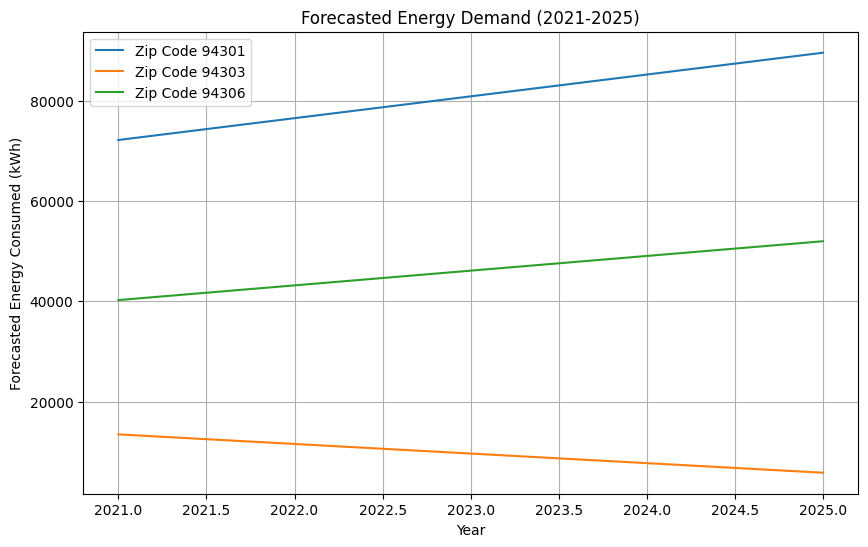

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'End Date' to datetime and extract year
df['End Date'] = pd.to_datetime(df['End Date'], format='%m-%d-%Y %H:%M', errors='coerce')
df['Year'] = df['End Date'].dt.year

# Group the data by zip code and year, and calculate the total energy consumed
grouped_df = df.groupby(['ZipCode', 'Year'])['Energy Consumed'].sum().reset_index()

# Get the list of unique zip codes
zip_codes = grouped_df['ZipCode'].unique()

# Specify the number of years to forecast
forecast_years = [2021, 2022, 2023, 2024, 2025]

# Initialize a dictionary to store the forecasted results
forecasted_results = {}

# Initialize a dictionary to store the evaluation metrics
evaluation_metrics = {}

# Iterate over each zip code
for zip_code in zip_codes:
    # Filter the data for the current zip code
    zip_code_data = grouped_df[grouped_df['ZipCode'] == zip_code]

    # Prepare the features (Year) and target variable (Energy Consumed)
    X = zip_code_data['Year'].values.reshape(-1, 1)
    y_energy = zip_code_data['Energy Consumed'].values.reshape(-1, 1)

    # Create and train linear regression model
    model_energy = LinearRegression()
    model_energy.fit(X, y_energy)

    # Make predictions on the observed data
    y_pred = model_energy.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_energy, y_pred)
    mae = mean_absolute_error(y_energy, y_pred)
    r2 = r2_score(y_energy, y_pred)

    # Store the evaluation metrics
    evaluation_metrics[zip_code] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

    # Forecast energy consumption for future years
    forecasted_energy = model_energy.predict(np.array(forecast_years).reshape(-1, 1))

    # Store the forecasted results for the current zip code
    forecasted_results[zip_code] = {
        'Year': forecast_years,
        'Forecasted Energy Consumed': forecasted_energy.flatten()
    }

# Print the evaluation metrics for each zip code
print("Evaluation Metrics")
for zip_code, metrics in evaluation_metrics.items():
    print(f"Zip Code: {zip_code}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"R2: {metrics['R2']:.2f}")
    print()

# Print the energy demand forecast for 5 years for each zip code as a table
print("Energy Demand Forecast for 5 Years")
for zip_code, results in forecasted_results.items():
    print(f"Zip Code: {zip_code}")
    print("Year | Forecasted Energy Consumed (kWh)")
    for year, energy in zip(results['Year'], results['Forecasted Energy Consumed']):
        print(f"{year} | {energy:.2f}")
    print()

# Plot the forecasted energy demand for each year from 2021-2025
plt.figure(figsize=(10, 6))
for zip_code, results in forecasted_results.items():
    plt.plot(results['Year'], results['Forecasted Energy Consumed'], label=f'Zip Code {zip_code}')

plt.xlabel('Year')
plt.ylabel('Forecasted Energy Consumed (kWh)')
plt.title('Forecasted Energy Demand (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()

# **Energy Demand Prediction using Random Forest Regressor**

Evaluation Metrics
Zip Code: 94301
MSE: 85757994.52
MAE: 6773.45
R2: 0.94

Zip Code: 94303
MSE: 24324104.60
MAE: 4213.96
R2: 0.89

Zip Code: 94306
MSE: 15539344.69
MAE: 2941.19
R2: 0.82

Energy Demand Forecast for 5 Years
Zip Code: 94301
Year | Forecasted Energy Consumed (kWh)
2021 | 22140.58
2022 | 22140.58
2023 | 22140.58
2024 | 22140.58
2025 | 22140.58

Zip Code: 94303
Year | Forecasted Energy Consumed (kWh)
2021 | 4774.52
2022 | 4774.52
2023 | 4774.52
2024 | 4774.52
2025 | 4774.52

Zip Code: 94306
Year | Forecasted Energy Consumed (kWh)
2021 | 32598.49
2022 | 32598.49
2023 | 32598.49
2024 | 32598.49
2025 | 32598.49



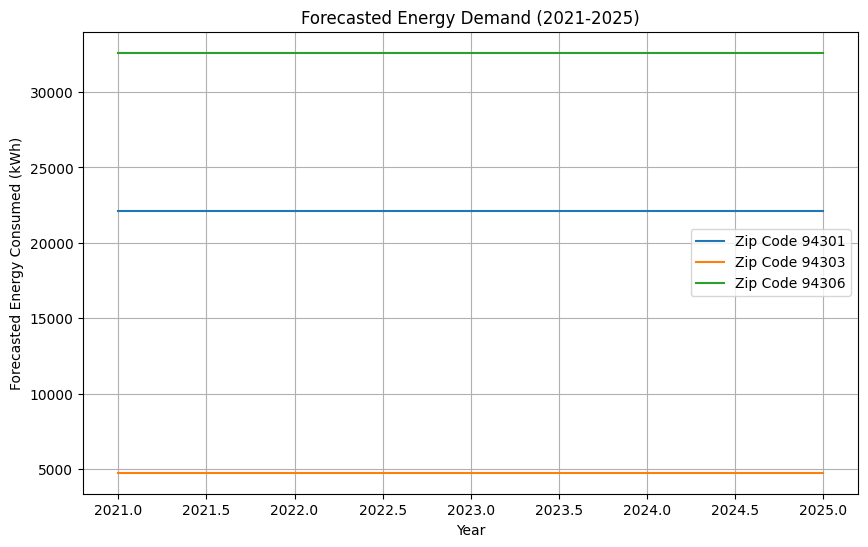

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'End Date' to datetime and extract year
df['End Date'] = pd.to_datetime(df['End Date'], format='%m-%d-%Y %H:%M', errors='coerce')
df['Year'] = df['End Date'].dt.year

# Group the data by zip code and year, and calculate the total energy consumed
grouped_df = df.groupby(['ZipCode', 'Year'])['Energy Consumed'].sum().reset_index()

# Get the list of unique zip codes
zip_codes = grouped_df['ZipCode'].unique()

# Specify the number of years to forecast
forecast_years = [2021, 2022, 2023, 2024, 2025]

# Initialize a dictionary to store the forecasted results
forecasted_results = {}

# Initialize a dictionary to store the evaluation metrics
evaluation_metrics = {}

# Iterate over each zip code
for zip_code in zip_codes:
    # Filter the data for the current zip code
    zip_code_data = grouped_df[grouped_df['ZipCode'] == zip_code]

    # Prepare the features (Year) and target variable (Energy Consumed)
    X = zip_code_data['Year'].values.reshape(-1, 1)
    y_energy = zip_code_data['Energy Consumed'].values.reshape(-1, 1)

    # Create and train random forest regression model
    model_energy = RandomForestRegressor(n_estimators=100, random_state=42)
    model_energy.fit(X, y_energy.ravel())

    # Make predictions on the observed data
    y_pred = model_energy.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_energy, y_pred)
    mae = mean_absolute_error(y_energy, y_pred)
    r2 = r2_score(y_energy, y_pred)

    # Store the evaluation metrics
    evaluation_metrics[zip_code] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

    # Forecast energy consumption for future years
    forecasted_energy = model_energy.predict(np.array(forecast_years).reshape(-1, 1))

    # Store the forecasted results for the current zip code
    forecasted_results[zip_code] = {
        'Year': forecast_years,
        'Forecasted Energy Consumed': forecasted_energy.flatten()
    }

# Print the evaluation metrics for each zip code
print("Evaluation Metrics")
for zip_code, metrics in evaluation_metrics.items():
    print(f"Zip Code: {zip_code}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"R2: {metrics['R2']:.2f}")
    print()

# Print the energy demand forecast for 5 years for each zip code as a table
print("Energy Demand Forecast for 5 Years")
for zip_code, results in forecasted_results.items():
    print(f"Zip Code: {zip_code}")
    print("Year | Forecasted Energy Consumed (kWh)")
    for year, energy in zip(results['Year'], results['Forecasted Energy Consumed']):
        print(f"{year} | {energy:.2f}")
    print()

# Plot the forecasted energy demand for each year from 2021-2025
plt.figure(figsize=(10, 6))
for zip_code, results in forecasted_results.items():
    plt.plot(results['Year'], results['Forecasted Energy Consumed'], label=f'Zip Code {zip_code}')

plt.xlabel('Year')
plt.ylabel('Forecasted Energy Consumed (kWh)')
plt.title('Forecasted Energy Demand (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()

# **Energy Demand Prediction using Gradient Boosting Machines (GBM)**

Evaluation Metrics
Zip Code: 94301
MSE: 2459.76
MAE: 36.37
R2: 1.00

Zip Code: 94303
MSE: 0.26
MAE: 0.43
R2: 1.00

Zip Code: 94306
MSE: 0.06
MAE: 0.20
R2: 1.00

Energy Demand Forecast for 5 Years
Zip Code: 94301
Year | Forecasted Energy Consumed (kWh)
2021 | 96.66
2022 | 96.66
2023 | 96.66
2024 | 96.66
2025 | 96.66

Zip Code: 94303
Year | Forecasted Energy Consumed (kWh)
2021 | 30.20
2022 | 30.20
2023 | 30.20
2024 | 30.20
2025 | 30.20

Zip Code: 94306
Year | Forecasted Energy Consumed (kWh)
2021 | 26656.21
2022 | 26656.21
2023 | 26656.21
2024 | 26656.21
2025 | 26656.21



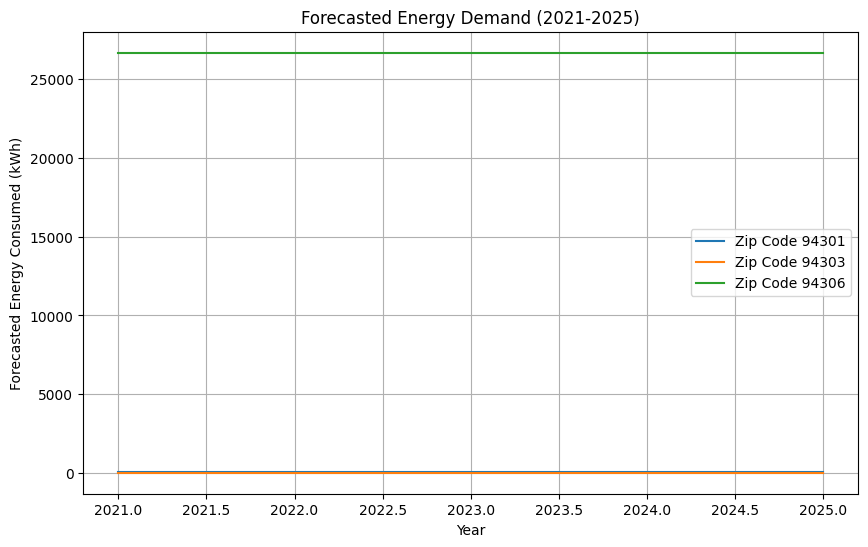

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'End Date' to datetime and extract year
df['End Date'] = pd.to_datetime(df['End Date'], format='%m-%d-%Y %H:%M', errors='coerce')
df['Year'] = df['End Date'].dt.year

# Group the data by zip code and year, and calculate the total energy consumed
grouped_df = df.groupby(['ZipCode', 'Year'])['Energy Consumed'].sum().reset_index()

# Get the list of unique zip codes
zip_codes = grouped_df['ZipCode'].unique()

# Specify the number of years to forecast
forecast_years = [2021, 2022, 2023, 2024, 2025]

# Initialize a dictionary to store the forecasted results
forecasted_results = {}

# Initialize a dictionary to store the evaluation metrics
evaluation_metrics = {}

# Iterate over each zip code
for zip_code in zip_codes:
    # Filter the data for the current zip code
    zip_code_data = grouped_df[grouped_df['ZipCode'] == zip_code]

    # Prepare the features (Year) and target variable (Energy Consumed)
    X = zip_code_data['Year'].values.reshape(-1, 1)
    y_energy = zip_code_data['Energy Consumed'].values.reshape(-1, 1)

    # Create and train gradient boosting regression model
    model_energy = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model_energy.fit(X, y_energy.ravel())

    # Make predictions on the observed data
    y_pred = model_energy.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_energy, y_pred)
    mae = mean_absolute_error(y_energy, y_pred)
    r2 = r2_score(y_energy, y_pred)

    # Store the evaluation metrics
    evaluation_metrics[zip_code] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

    # Forecast energy consumption for future years
    forecasted_energy = model_energy.predict(np.array(forecast_years).reshape(-1, 1))

    # Store the forecasted results for the current zip code
    forecasted_results[zip_code] = {
        'Year': forecast_years,
        'Forecasted Energy Consumed': forecasted_energy.flatten()
    }

# Print the evaluation metrics for each zip code
print("Evaluation Metrics")
for zip_code, metrics in evaluation_metrics.items():
    print(f"Zip Code: {zip_code}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"R2: {metrics['R2']:.2f}")
    print()

# Print the energy demand forecast for 5 years for each zip code as a table
print("Energy Demand Forecast for 5 Years")
for zip_code, results in forecasted_results.items():
    print(f"Zip Code: {zip_code}")
    print("Year | Forecasted Energy Consumed (kWh)")
    for year, energy in zip(results['Year'], results['Forecasted Energy Consumed']):
        print(f"{year} | {energy:.2f}")
    print()

# Plot the forecasted energy demand for each year from 2021-2025
plt.figure(figsize=(10, 6))
for zip_code, results in forecasted_results.items():
    plt.plot(results['Year'], results['Forecasted Energy Consumed'], label=f'Zip Code {zip_code}')

plt.xlabel('Year')
plt.ylabel('Forecasted Energy Consumed (kWh)')
plt.title('Forecasted Energy Demand (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()

# **Energy Demand Forecasting using ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupporte

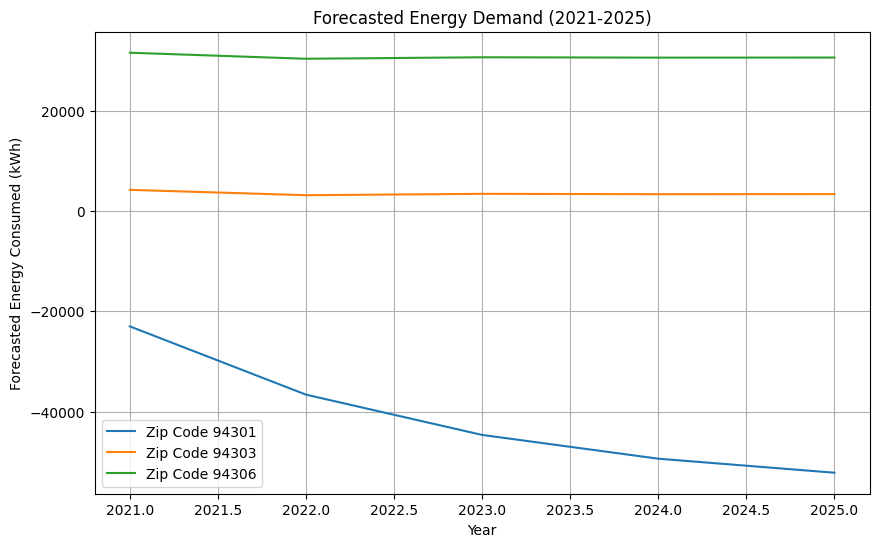

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('CS_Processed_v3.csv')

# Convert 'End Date' to datetime and extract year
df['End Date'] = pd.to_datetime(df['End Date'], format='%m-%d-%Y %H:%M', errors='coerce')
df['Year'] = df['End Date'].dt.year

# Group the data by zip code and year, and calculate the total energy consumed
grouped_df = df.groupby(['ZipCode', 'Year'])['Energy Consumed'].sum().reset_index()

# Get the list of unique zip codes
zip_codes = grouped_df['ZipCode'].unique()

# Specify the number of years to forecast
forecast_years = [2021, 2022, 2023, 2024, 2025]

# Initialize a dictionary to store the forecasted results
forecasted_results = {}

# Iterate over each zip code
for zip_code in zip_codes:
    # Filter the data for the current zip code
    zip_code_data = grouped_df[grouped_df['ZipCode'] == zip_code].sort_values('Year')

    # Prepare the features (Year) and target variable (Energy Consumed)
    X = zip_code_data['Year']
    y_energy = zip_code_data['Energy Consumed']

    # Fit ARIMA model (assuming non-seasonal data, we use ARIMA instead of SARIMA)
    # The order (p,d,q) needs to be determined using ACF and PACF plots or grid search
    # For simplicity, we'll use (1,1,1) as a starting point
    model = ARIMA(y_energy, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast energy consumption for future years
    forecasted_energy = model_fit.get_forecast(steps=len(forecast_years)).predicted_mean

    # Store the forecasted results for the current zip code
    forecasted_results[zip_code] = {
        'Year': forecast_years,
        'Forecasted Energy Consumed': forecasted_energy
    }

# Plot the forecasted energy demand for each year from 2021-2025
plt.figure(figsize=(10, 6))
for zip_code, results in forecasted_results.items():
    plt.plot(results['Year'], results['Forecasted Energy Consumed'], label=f'Zip Code {zip_code}')

plt.xlabel('Year')
plt.ylabel('Forecasted Energy Consumed (kWh)')
plt.title('Forecasted Energy Demand (2021-2025)')
plt.legend()
plt.grid(True)
plt.show()